<font color='darkred' size='4'> A detailed exploratory data analysis and regression models guide with House Price<font>

<font color='darkblue'>This core is a step by step analysis from data mining to feature selection and modeling in order to solve House Pricing with Advanced Regression Analysis.
Here are the different parts of this core:
    
I.	Explarotory data analysis
    
    I.1. General exploration

    I.2. Numerical features
        I.2.1. Explore and clean Numerical features
        I.2.2. Missing data of Numerical features

    I.3. Categorical features
        I.3.1. Explore and clean Categorical features
        I.3.2. Missing data of Categorical features
        I.3.3. Transform Categorical features into Binary features (get_dummies)

    I.4. Merge numerical and binary features into one data set

    I.5. Drop outliers from the train set
    

II.	Feature engineering

III.	Preparing data for modeling
    
    III.1. Target variable 'SalePrice'
    
    III.2. Split data into train and test and Standardization

    III.3. Backward Stepwise Regression

    III.4. Variance Inflation Factor

    III.5. Cook distance

IV.	Modeling

    IV.1. Models and metrics selection

    IV.2. Hyperparameters tuning and model optimization
        IV.2.1. Ridge regression
        IV.2.2. Lasso regression
        IV.2.3. Elastic Net regression
        IV.2.4. Random Forest regression
        IV.2.5. XGBoost regression
        IV.2.6. LightGBM regression

    IV.3. Choosing the best model

    IV.4. Prediction on 'House Prices-Advanced Regression Techniques' test data set

<font color='darkred' size='3'>Data set: <font color='darkblue' size='3'>the training and test datasets were imported from the kaggle competition "House Prices - Advanced Regression Techniques".  [Both data sets have been imported from this link of the competition](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)

<font color='darkblue' size='3'>This work was inspired from some of the kernels in the same competition as well as other sources and machine learning tutorials. All the steps from data mining to modeling are in this same notebook.
    
<font color='darkred' size='3'>Goal: <font color='darkblue' size='3'>the goal from this kernel is choose the best model that best fits our problem. Thus, in this kernel we will start by cleaning the data, processing the missing data, selecting the relevant variables, deducing some features, run statistical tests, defining the regression models and finally choosing the best price prediction model for the test set.

# <font color='darkblue'>I. Explarotory data analysis</font>

<font color='darkblue' size='3'>This exploratory analysis and feature engineering are mainly based on these Kaggle cores:
    
- [Comprehensive data exploration with python](https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python)
    
- [Detailed exploratory data analysis with python](https://www.kaggle.com/code/ekami66/detailed-exploratory-data-analysis-with-python)
    
- [House price just with categorical features](https://www.kaggle.com/code/hosseinbehjat/house-price-just-with-categorical-features)
    
- [Handling missing values](https://www.kaggle.com/code/dansbecker/handling-missing-values)

## <font color='darkblue'>I.1. General exploration</font>

In [1]:
# Load librarie
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import verstack
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import sklearn

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.impute import SimpleImputer
from verstack.stratified_continuous_split import scsplit
from sklearn import preprocessing

warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(rc={"figure.figsize": (20, 15)})
sns.set_style("whitegrid")

<IPython.core.display.Javascript object>

<font color ='darkblue'>All along the notebook I used Autopep8 Nbextensions to respect the PEP 8 standard conventions.

In [2]:
# Load Train set
df_train = pd.read_csv("train.csv")
print(f"Train set shape:\n{df_train.shape}\n")

# Load Test set
df_test = pd.read_csv("test.csv")
print(f"Test set shape:\n{df_test.shape}")

Train set shape:
(1460, 81)

Test set shape:
(1459, 80)


<IPython.core.display.Javascript object>

In [3]:
# info of each of the variables in our train set
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<IPython.core.display.Javascript object>

<font color='darkblue'>We can notice that many columns have missing data. I will handlle these missing values later in this notebook</font>

In [4]:
# Checking if column headings are the same in both data set
dif_1 = [x for x in df_train.columns if x not in df_test.columns]
print(f"Columns present in df_train and absent in df_test: {dif_1}\n")

dif_2 = [x for x in df_test.columns if x not in df_train.columns]
print(f"Columns present in df_test set and absent in df_train: {dif_2}")

List of columns that are present in df_train and absent in df_test: ['SalePrice']

List of columns that are present in df_test set and absent in df_train: []


<IPython.core.display.Javascript object>

<font color = 'darkblue'> The only column present in the train set and absent in the test set is 'SalePrice' which is the target variable to be predicted. So it's OK !

<font color = 'red'>PS: <font color ='darkblue'>throughout our analysis, the df_test will receive the same data processing as df_train in order to have the same features in both datasets for modeling and prediction.<font>

In [5]:
# Drop the 'Id' column from the train set
df_train.drop(["Id"], axis=1, inplace=True)

# Save the list of 'Id' before dropping it from the test set
Id_test_list = df_test["Id"].tolist()
df_test.drop(["Id"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

## <font color='darkblue'>I.2. Numerical features</font>

### <font color='darkblue'>I.2.1. Explore and clean Numerical features</font>

In [6]:
# Let's select the columns of the train set with numerical data
df_train_num = df_train.select_dtypes(exclude=["object"])
df_train_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


<IPython.core.display.Javascript object>

In [7]:
# Let's drop quasi-constant features where 95% of the values are similar or constant
# 0.05: drop column where 95% of the values are constant
sel = VarianceThreshold(threshold=0.05)

# fit finds the features with constant variance
sel.fit(df_train_num.iloc[:, :-1])


# Get the number of features that are not constant
print(f"Number of retained features: {sum(sel.get_support())}")
print(
    f"\nNumber of quasi_constant features: {len(df_train_num.iloc[:, :-1].columns) - sum(sel.get_support())}")

quasi_constant_features_list = [x for x in df_train_num.iloc[:, :-
                                                             1].columns if x not in df_train_num.iloc[:, :-1].columns[sel.get_support()]]

print(
    f"\nQuasi-constant features to be dropped: {quasi_constant_features_list}")


# Let's drop these columns from df_train_num
df_train_num.drop(quasi_constant_features_list, axis=1, inplace=True)

Number of retained features: 35

Number of quasi_constant features: 1

Quasi-constant features to be dropped: ['KitchenAbvGr']


<IPython.core.display.Javascript object>

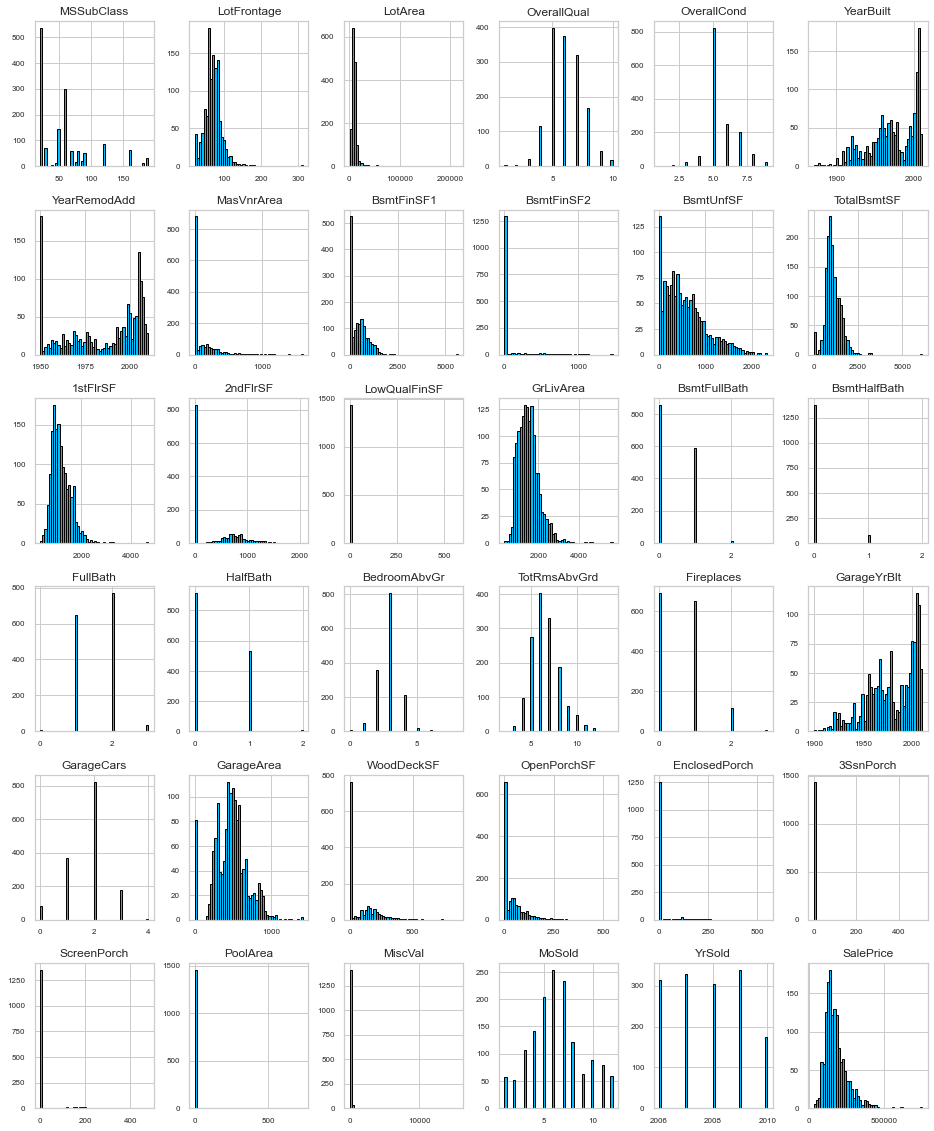

<IPython.core.display.Javascript object>

In [8]:
# Plot the distribution of all the numerical data
fig_ = df_train_num.hist(figsize=(16, 20), bins=50, color="deepskyblue",
                         edgecolor="black", xlabelsize=8, ylabelsize=8)

<AxesSubplot:>

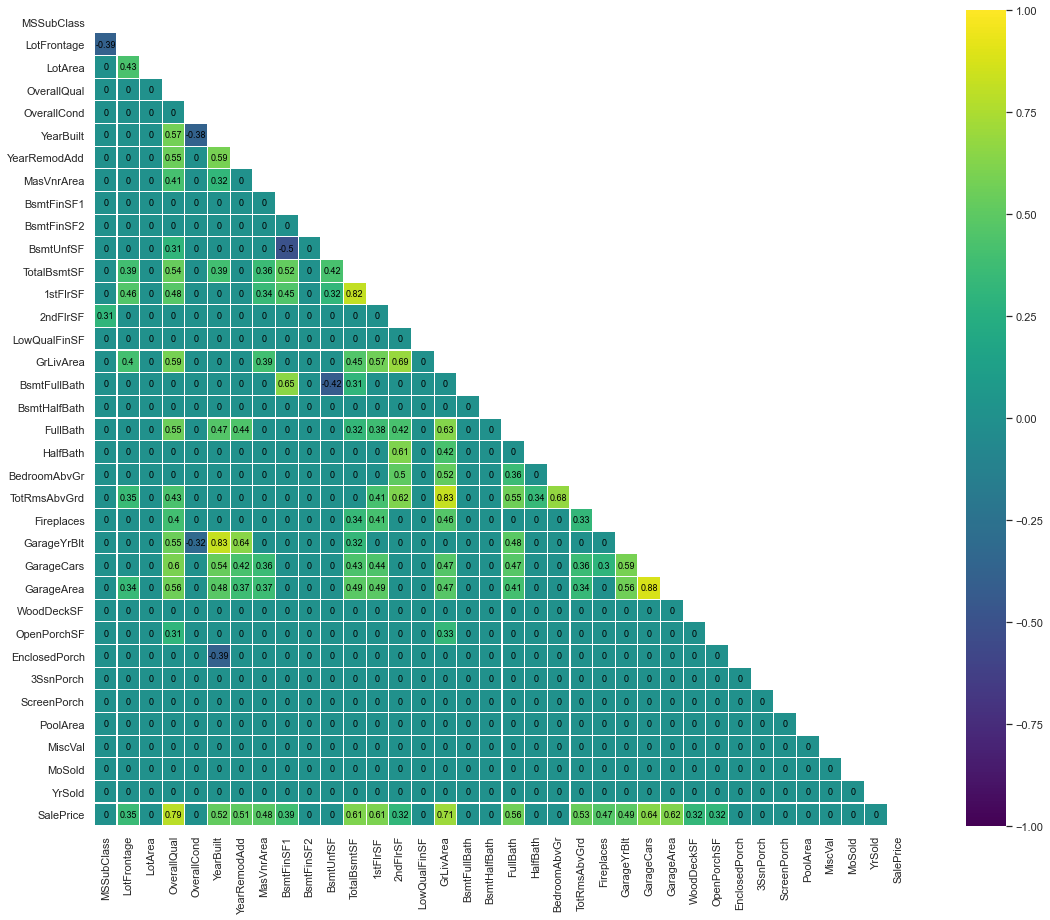

<IPython.core.display.Javascript object>

In [9]:
# Heatmap for all the remaining numerical data including the taget 'SalePrice'

# Define the heatmap parameters
pd.options.display.float_format = "{:,.2f}".format

# Define correlation matrix
corr_matrix = df_train_num.corr()

# Replace correlation < |0.3| by 0 for a better visibility
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0

# Mask the upper part of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Choose the color map
cmap = "viridis"

# plot the heatmap
sns.heatmap(corr_matrix, mask=mask, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 9, "color": "black"}, square=True, cmap=cmap, annot=True)

<font color='darkblue'>From the distribution of each numerical variables as well as the heatmap we can notice 18 features that are important and correlated (correlation higher than absolute 0.3) with our target variable 'SalePrice'.
    
We can also notice that a lot of features are correlated with each other. I will handle these correlation while selecting the features for our models.<font>

In [10]:
# Let's select features where the correlation with 'SalePrice' is higher than |0.3|
# -1 because the latest row is SalePrice
df_num_corr = df_train_num.corr()["SalePrice"][:-1]

# Correlated features (r2 > 0.5)
high_features_list = df_num_corr[abs(
    df_num_corr) >= 0.5].sort_values(ascending=False)
print(
    f"{len(high_features_list)} strongly correlated values with SalePrice:\n{high_features_list}\n")

# Correlated features (0.3 < r2 < 0.5)
low_features_list = df_num_corr[(abs(df_num_corr) < 0.5) & (
    abs(df_num_corr) >= 0.3)].sort_values(ascending=False)
print(
    f"{len(low_features_list)} slightly correlated values with SalePrice:\n{low_features_list}")

- There is 10 strongly correlated values with SalePrice:
OverallQual    0.79
GrLivArea      0.71
GarageCars     0.64
GarageArea     0.62
TotalBsmtSF    0.61
1stFlrSF       0.61
FullBath       0.56
TotRmsAbvGrd   0.53
YearBuilt      0.52
YearRemodAdd   0.51
Name: SalePrice, dtype: float64

- There is 8 slightly correlated values with SalePrice:
GarageYrBlt   0.49
MasVnrArea    0.48
Fireplaces    0.47
BsmtFinSF1    0.39
LotFrontage   0.35
WoodDeckSF    0.32
2ndFlrSF      0.32
OpenPorchSF   0.32
Name: SalePrice, dtype: float64


<IPython.core.display.Javascript object>

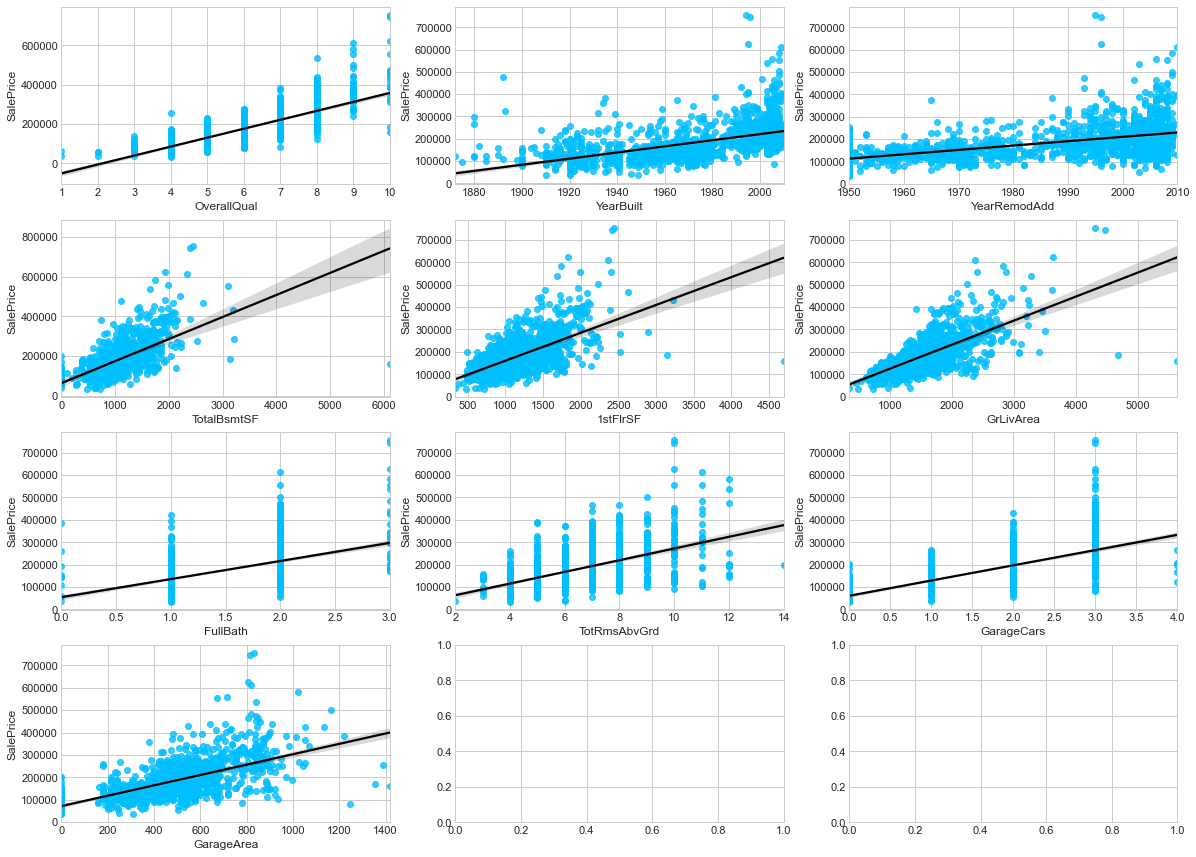

<IPython.core.display.Javascript object>

In [11]:
# Features with high correlation (higher than 0.5)
strong_features = df_num_corr[abs(df_num_corr) >= 0.5].index.tolist()
strong_features.append("SalePrice")

df_strong_features = df_train_num.loc[:, strong_features]

plt.style.use("seaborn-whitegrid")  # define figures style
fig, ax = plt.subplots(round(len(strong_features) / 3), 3)

for i, ax in enumerate(fig.axes):
    # plot the correlation of each feature with SalePrice
    if i < len(strong_features)-1:
        sns.regplot(x=strong_features[i], y="SalePrice", data=df_strong_features, ax=ax, scatter_kws={
                    "color": "deepskyblue"}, line_kws={"color": "black"})

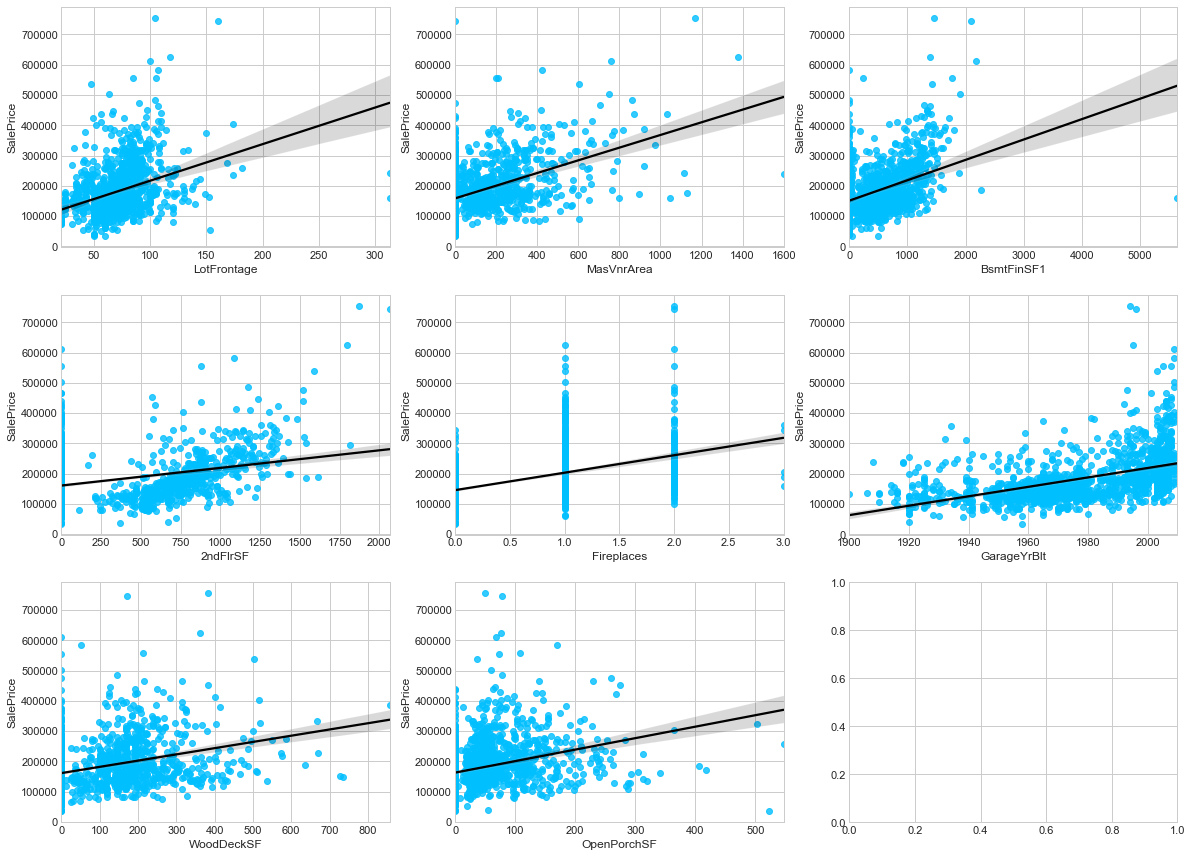

<IPython.core.display.Javascript object>

In [12]:
# Features with low correlation (between 0.3 and 0.5)
low_features = df_num_corr[(abs(df_num_corr) >= 0.3) & (
    abs(df_num_corr) < 0.5)].index.tolist()
low_features.append("SalePrice")

df_low_features = df_train_num.loc[:, low_features]

plt.style.use("seaborn-whitegrid")  # define figures style
fig, ax = plt.subplots(round(len(low_features) / 3), 3)

for i, ax in enumerate(fig.axes):
    # plot the correlation of each feature with SalePrice
    if i < len(low_features) - 1:
        sns.regplot(x=low_features[i], y="SalePrice", data=df_low_features, ax=ax, scatter_kws={
                    "color": "deepskyblue"}, line_kws={"color": "black"},)

<font color='darkblue'> Here we can notice several houses where the price is not expensive (less than 250 000 dollars) for the corresponding surface ('TotalBsmtSF', '1stFlrSF', 'GrLivaArea' etc.). It is better to remove these observations to avoid influencing the prediction model. <font>
    We can also note that for some features that designate a given area there is too much price variation for an area equal to 0, e.g. 'WoodDeckSF', 'OpenPorchSF' etc. 
    
I will drop these outliers at the end of the data mining. 

In [13]:
# Define the list of numerical fetaures to keep
list_of_numerical_features = strong_features[:-1] + low_features

# Let's select these features form our train set
df_train_num = df_train_num.loc[:, list_of_numerical_features]

# The same features are selected from the test set (-1 -> except 'SalePrice')
df_test_num = df_test.loc[:, list_of_numerical_features[:-1]]

<IPython.core.display.Javascript object>

<font color='darkblue'>Here I kept the 18 most correlated numerical features with 'SalePrice'

### <font color='darkblue'>I.2.2. Missing data of Numerical features</font>

### <font color='darkblue'>Train set</font>

Text(0, 0.5, 'Column Name\n')

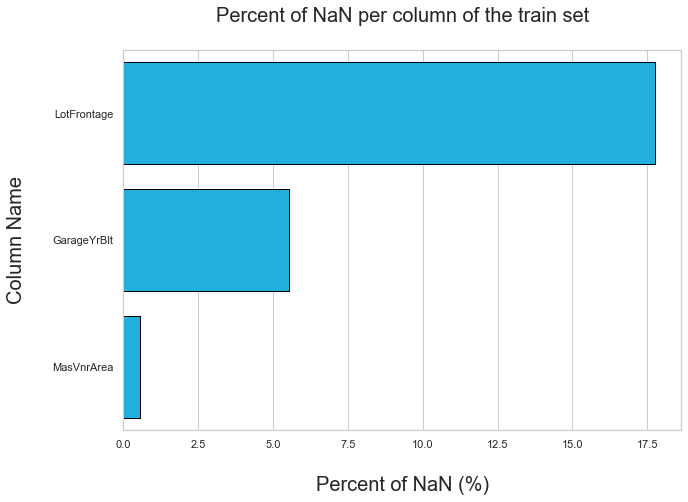

<IPython.core.display.Javascript object>

In [14]:
# Check the NaN of the train set by ploting percent of missing values per column
column_with_nan = df_train_num.columns[df_train_num.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(
        round(df_train_num[i].isnull().sum()*100/len(df_train_num), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="deepskyblue")

p.set_title("Percent of NaN per column of the train set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

In [15]:
# Imputation of missing values (NaNs) with SimpleImputer
my_imputer = SimpleImputer(strategy="median")
df_train_imputed = pd.DataFrame(my_imputer.fit_transform(df_train_num))
df_train_imputed.columns = df_train_num.columns

<IPython.core.display.Javascript object>

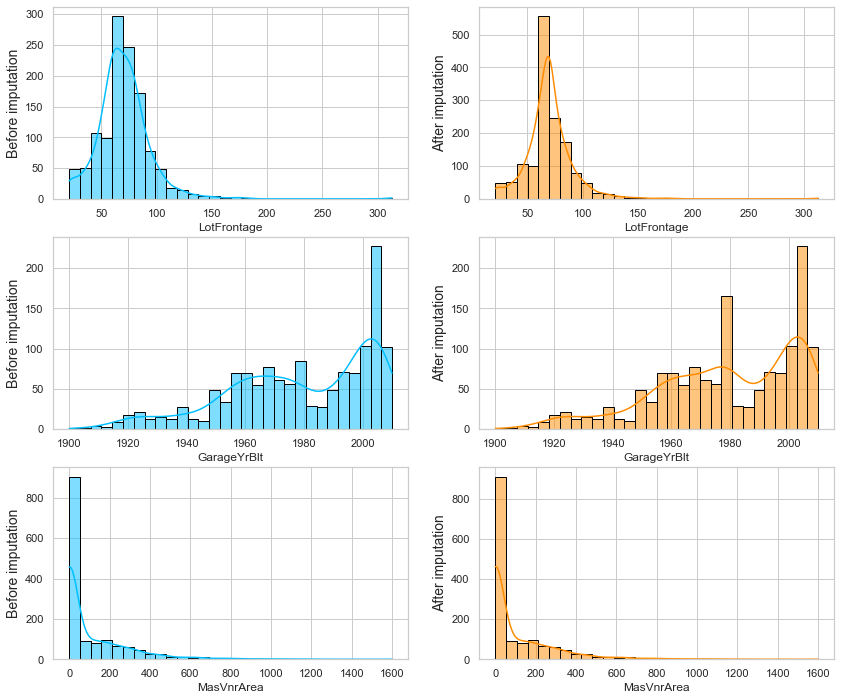

<IPython.core.display.Javascript object>

In [16]:
# Let's check the distribution of each imputed feature before and after imputation

# Define figure parameters
sns.set(rc={"figure.figsize": (14, 12)})
sns.set_style("whitegrid")
fig, axes = plt.subplots(3, 2)

# Plot the results
for feature, fig_pos in zip(["LotFrontage", "GarageYrBlt", "MasVnrArea"], [0, 1, 2]):

    """Features distribution before and after imputation"""

    # before imputation
    p = sns.histplot(ax=axes[fig_pos, 0], x=df_train_num[feature],
                     kde=True, bins=30, color="deepskyblue", edgecolor="black")
    p.set_ylabel(f"Before imputation", fontsize=14)

    # after imputation
    q = sns.histplot(ax=axes[fig_pos, 1], x=df_train_imputed[feature],
                     kde=True, bins=30, color="darkorange", edgecolor="black")
    q.set_ylabel(f"After imputation", fontsize=14)

<font color='darkblue'>For "LotFrontage" and "GarageYrBlt" the distributions have changed after imputations. There is an over-representation of the median class of the original distribution. However, the distribution remains the same for "MasVnrArea". Thus, to avoid any error related to the imputation I keep only the feature "MasVnrArea" for my analyses.<font>


In [17]:
# Drop 'LotFrontage' and 'GarageYrBlt'
df_train_imputed.drop(["LotFrontage", "GarageYrBlt"], axis=1, inplace=True)
df_train_imputed.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MasVnrArea,BsmtFinSF1,2ndFlrSF,Fireplaces,WoodDeckSF,OpenPorchSF,SalePrice
0,7.00,"2,003.00","2,003.00",856.00,856.00,"1,710.00",2.00,8.00,2.00,548.00,196.00,706.00,854.00,0.00,0.00,61.00,"208,500.00"
1,6.00,"1,976.00","1,976.00","1,262.00","1,262.00","1,262.00",2.00,6.00,2.00,460.00,0.00,978.00,0.00,1.00,298.00,0.00,"181,500.00"
2,7.00,"2,001.00","2,002.00",920.00,920.00,"1,786.00",2.00,6.00,2.00,608.00,162.00,486.00,866.00,1.00,0.00,42.00,"223,500.00"
3,7.00,"1,915.00","1,970.00",756.00,961.00,"1,717.00",1.00,7.00,3.00,642.00,0.00,216.00,756.00,1.00,0.00,35.00,"140,000.00"
4,8.00,"2,000.00","2,000.00","1,145.00","1,145.00","2,198.00",2.00,9.00,3.00,836.00,350.00,655.00,"1,053.00",1.00,192.00,84.00,"250,000.00"


<IPython.core.display.Javascript object>

### <font color='darkblue'>Test set</font>

<font color='darkblue'>The columns that have been deleted in the train set must also be deleted in the test set so that the two data sets remain identical for the modeling and prediction.<font>

In [18]:
# Drop the same features from test set as for the train set
df_test_num.drop(["LotFrontage", "GarageYrBlt"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Column Name\n')

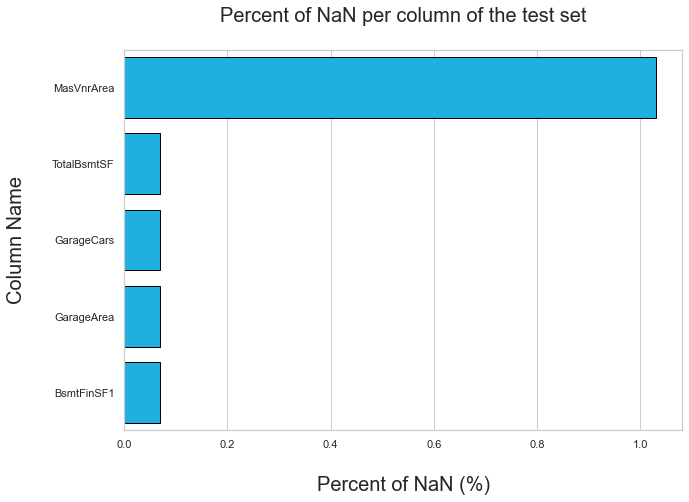

<IPython.core.display.Javascript object>

In [19]:
# Check the NaN of the test set by ploting percent of missing values per column
column_with_nan = df_test_num.columns[df_test_num.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(
        round(df_test_num[i].isnull().sum()*100/len(df_test_num), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="deepskyblue")

p.set_title("Percent of NaN per column of the test set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

In [20]:
# Imputation of missing values (NaNs) with SimpleImputer
my_imputer = SimpleImputer(strategy="median")
df_test_imputed = pd.DataFrame(my_imputer.fit_transform(df_test_num))
df_test_imputed.columns = df_test_num.columns

<IPython.core.display.Javascript object>

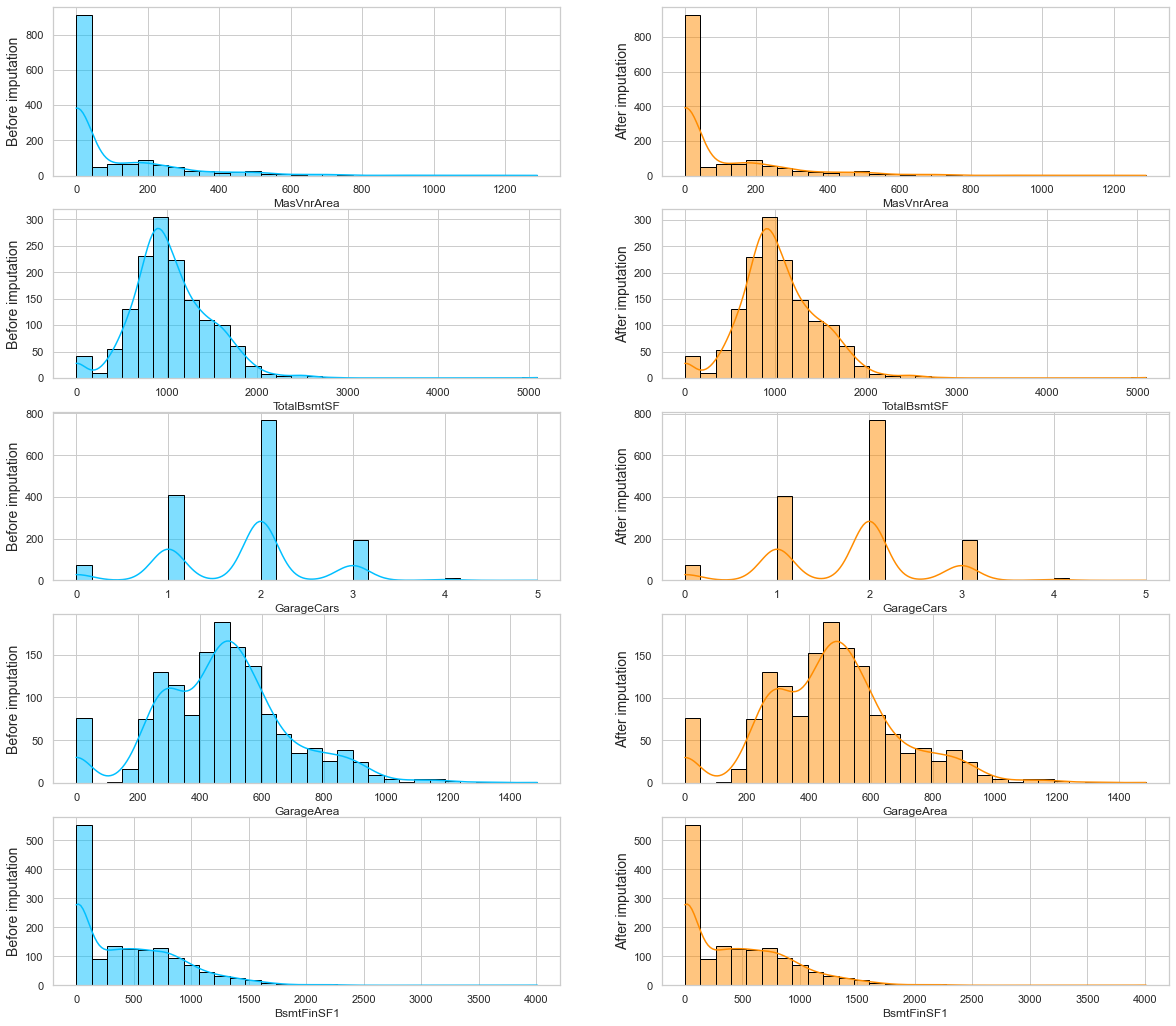

<IPython.core.display.Javascript object>

In [21]:
# Let's check the distribution of each imputed feature before and after imputation

# Define figure parameters
sns.set(rc={"figure.figsize": (20, 18)})
sns.set_style("whitegrid")
fig, axes = plt.subplots(5, 2)

# Plot the results
for feature, fig_pos in zip(tab["Column"].tolist(), range(0, 6)):

    """Features distribution before and after imputation"""

    # before imputation
    p = sns.histplot(ax=axes[fig_pos, 0], x=df_test_num[feature],
                     kde=True, bins=30, color="deepskyblue", edgecolor="black")
    p.set_ylabel(f"Before imputation", fontsize=14)

    # after imputation
    q = sns.histplot(ax=axes[fig_pos, 1], x=df_test_imputed[feature],
                     kde=True, bins=30, color="darkorange", edgecolor="black",)
    q.set_ylabel(f"After imputation", fontsize=14)

<font color='darkblue'>The percentage of NaN in each of these fetaures did not exceed 1.5%. Thus, by imputing these missing data, few errors were introduced and the distributions are similar before and after imputation.<font>

## <font color='darkblue'>I.3. Categorical features</font>

### <font color='darkblue'>I.3.1. Explore and clean Categorical features</font>

In [22]:
# Categorical to Quantitative relationship
categorical_features = [
    i for i in df_train.columns if df_train.dtypes[i] == "object"]
categorical_features.append("SalePrice")

# Train set
df_train_categ = df_train[categorical_features]

# Test set (-1 because test set don't have 'Sale Price')
df_test_categ = df_test[categorical_features[:-1]]

<IPython.core.display.Javascript object>

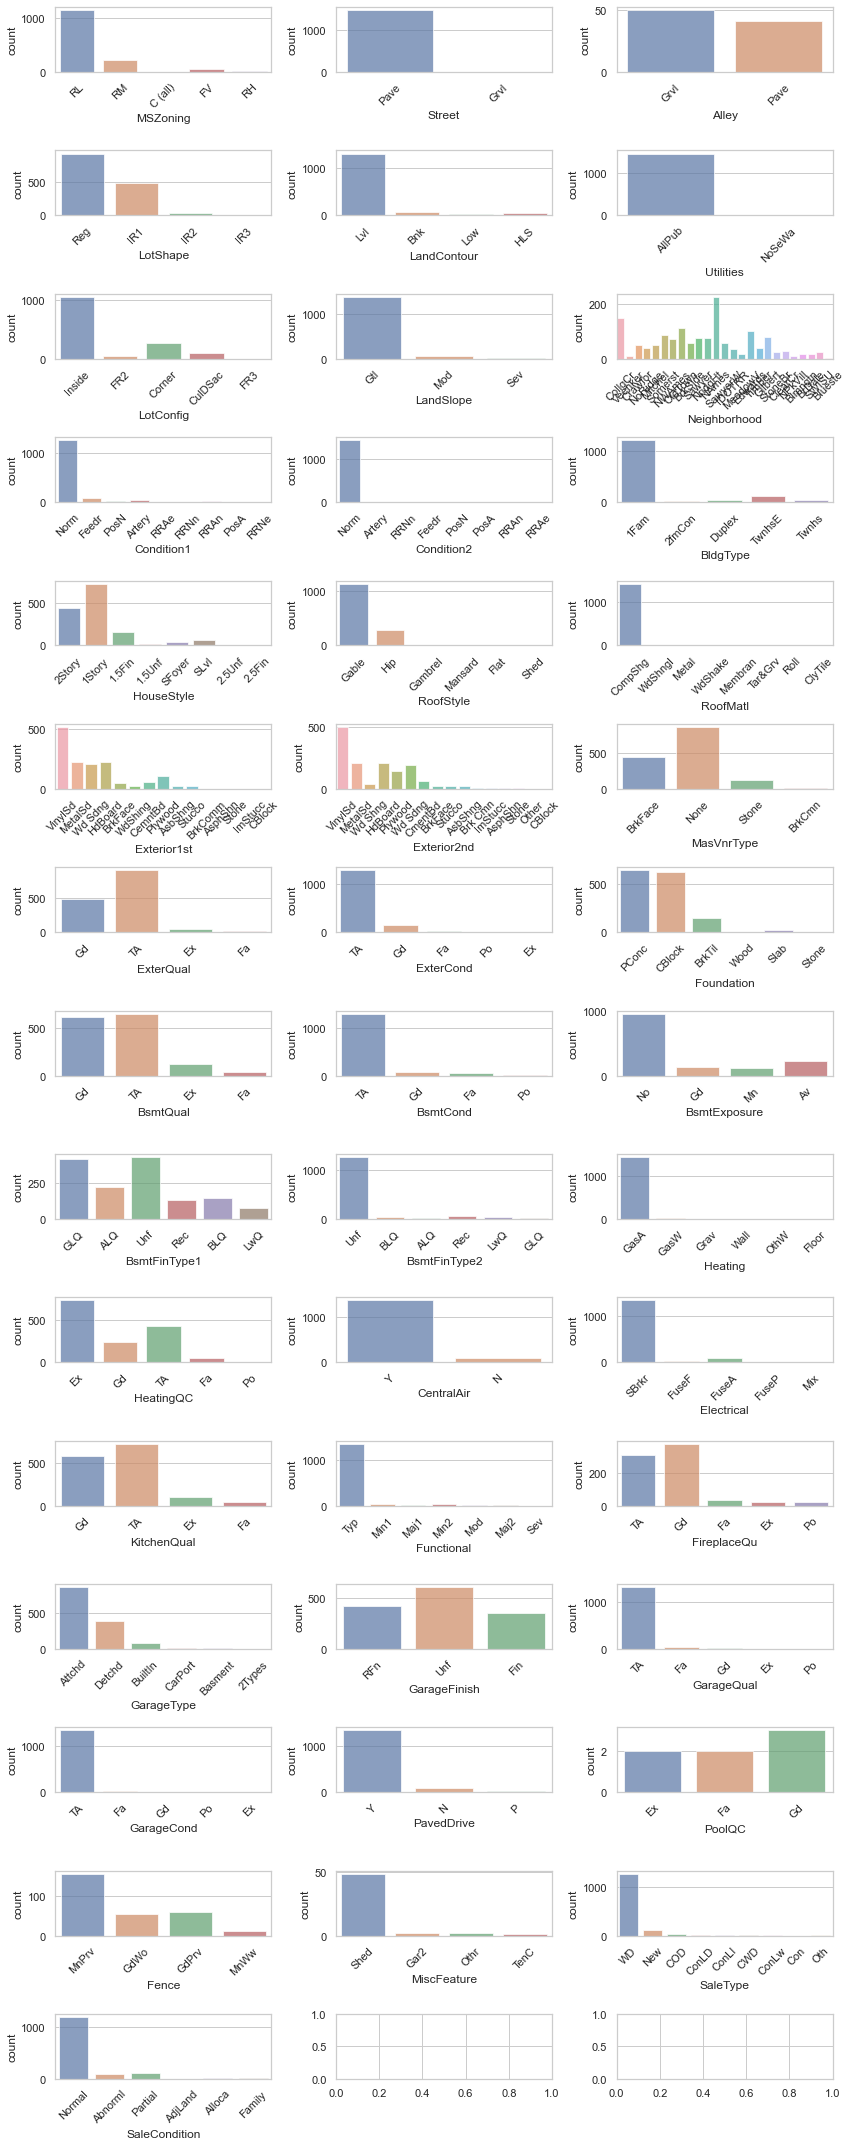

<IPython.core.display.Javascript object>

In [23]:
# Countplot for each of the categorical features in the train set
fig, axes = plt.subplots(
    round(len(df_train_categ.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    # plot barplot of each feature
    if i < len(df_train_categ.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(
            x=df_train_categ.columns[i], alpha=0.7, data=df_train_categ, ax=ax)

fig.tight_layout()

<font color='darkblue'>By looking closely at each of the count plots we can notice that for some categorical feature the observation are concentrated in a single level of the category. These features are less informative for our model, so it would be better to remove them.<font>

In [24]:
# Drop some categorical 'non-informative' features from train set
columns_to_drop = [
    "Street",
    "Alley",
    "LandContour",
    "Utilities",
    "LandSlope",
    "Condition2",
    "RoofMatl",
    "CentralAir",
    "GarageQual",
    "GarageCond",
    "SaleType",
    "PavedDrive",
    "LandContour",
    "ExterCond",
    "GarageCond",
    "Heating",
    "MiscFeature",
    "BsmtFinType2",
    "Functional",
    "GarageQual",
    "GarageCond",
]

# Train set
df_train_categ.drop(columns_to_drop, axis=1, inplace=True)

# Test set
df_test_categ.drop(columns_to_drop, axis=1, inplace=True)

<IPython.core.display.Javascript object>

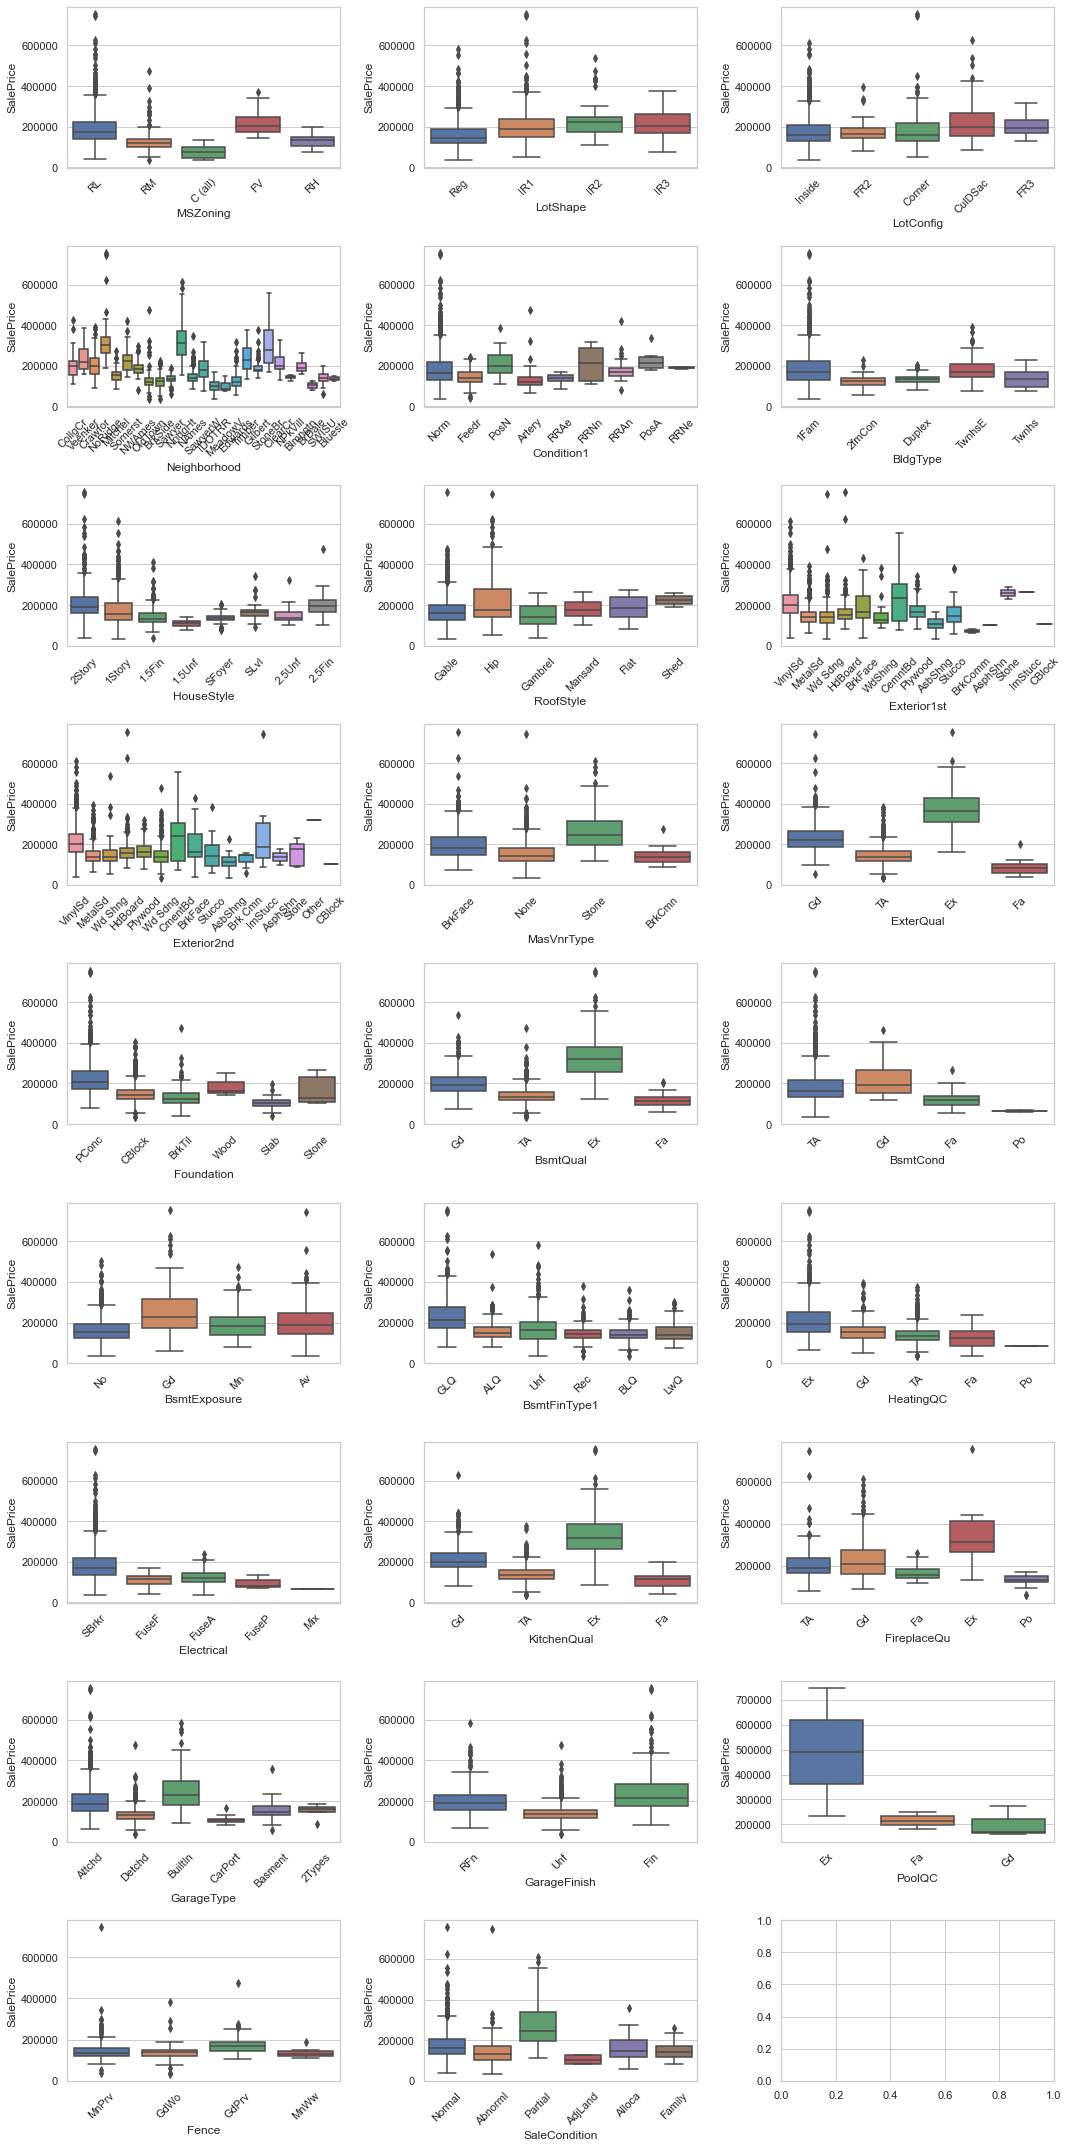

<IPython.core.display.Javascript object>

In [25]:
# With the boxplot we can see the variation of the target 'SalePrice' in each of the categorical features
fig, axes = plt.subplots(
    round(len(df_train_categ.columns)/3), 3, figsize=(15, 30))

for i, ax in enumerate(fig.axes):
    # plot the variation of SalePrice in each feature
    if i < len(df_train_categ.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(
            x=df_train_categ.columns[i], y="SalePrice", data=df_train_categ, ax=ax)

fig.tight_layout()

<font color='darkblue'>Some of these features seem to be codependent such as 'Exterior1st' &  'Exterior2nd', 'BsmtQual' & 'BsmtCond', 'MasVnrType' & 'ExterQual' etc.
So let's plot the contingency table and perform the Chi square test in order to identify these codependency <font>

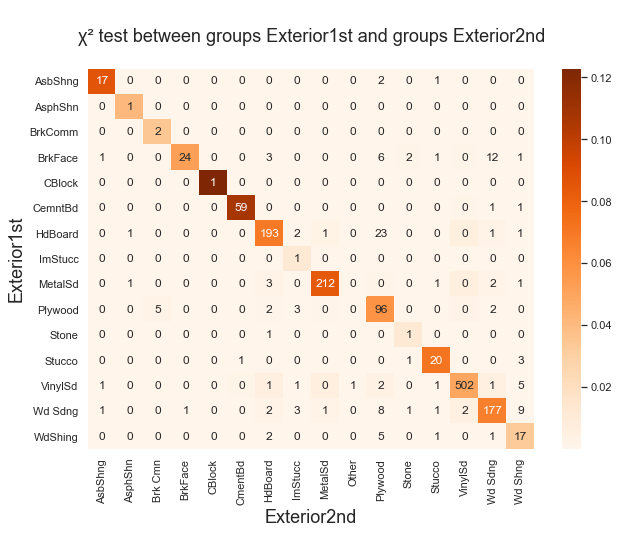

The P-Value of the ChiSq Test bewteen Exterior1st and Exterior2nd is: 0.0



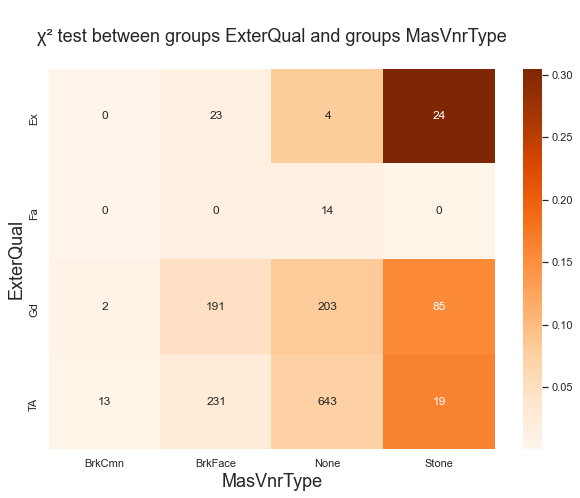

The P-Value of the ChiSq Test bewteen ExterQual and MasVnrType is: 1.0187554679218715e-54



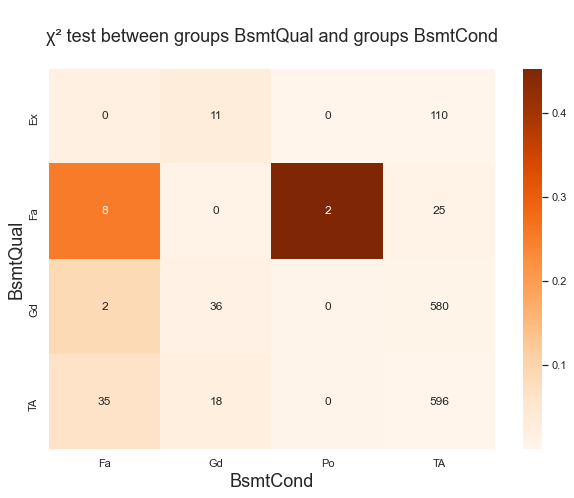

The P-Value of the ChiSq Test bewteen BsmtQual and BsmtCond is: 1.9371809126533347e-31



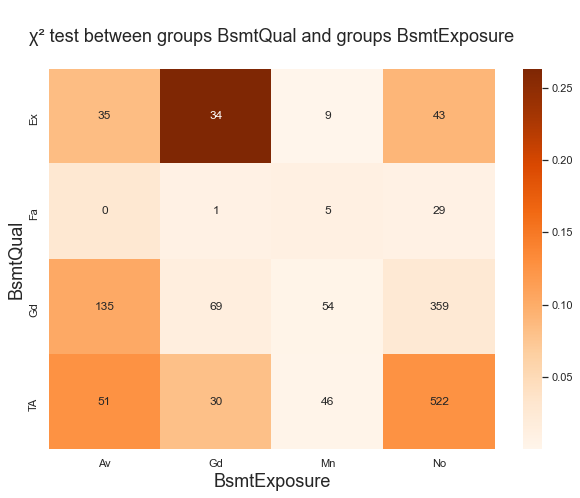

The P-Value of the ChiSq Test bewteen BsmtQual and BsmtExposure is: 3.879215036512606e-32



<IPython.core.display.Javascript object>

In [26]:
# importing the required function

sns.set(rc={"figure.figsize": (10, 7)})

X = ["Exterior1st", "ExterQual", "BsmtQual", "BsmtQual", "BsmtQual"]
Y = ["Exterior2nd", "MasVnrType", "BsmtCond", "BsmtExposure"]

for i, j in zip(X, Y):

    # Contingency table
    cont = df_train_categ[[i, j]].pivot_table(
        index=i, columns=j, aggfunc=len, margins=True, margins_name="Total")
    tx = cont.loc[:, ["Total"]]
    ty = cont.loc[["Total"], :]
    n = len(df_train_categ)
    indep = tx.dot(ty) / n
    c = cont.fillna(0)  # Replace NaN with 0 in the contingency table
    measure = (c - indep) ** 2 / indep
    xi_n = measure.sum().sum()
    table = measure / xi_n

    # Plot contingency table
    p = sns.heatmap(table.iloc[:-1, :-1],
                    annot=c.iloc[:-1, :-1], fmt=".0f", cmap="Oranges")
    p.set_xlabel(j, fontsize=18)
    p.set_ylabel(i, fontsize=18)
    p.set_title(f"\nχ² test between groups {i} and groups {j}\n", size=18)
    plt.show()

    # Performing Chi-sq test
    CrosstabResult = pd.crosstab(
        index=df_train_categ[i], columns=df_train_categ[j])
    ChiSqResult = chi2_contingency(CrosstabResult)
    # P-Value is the Probability of H0 being True
    print(
        f"P-Value of the ChiSq Test bewteen {i} and {j} is: {ChiSqResult[1]}\n")

<font color='darkblue'> p-value is significant for all tests so there is some co-dependence between these variables. For this I will drop 'Exterior2nd', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1' and 'MasVnrType'<font>

In [27]:
# Let's drop the one of each co-dependent variables
# Train set
df_train_categ.drop(Y, axis=1, inplace=True)

# Test set
df_test_categ.drop(Y, axis=1, inplace=True)

<IPython.core.display.Javascript object>

### <font color='darkblue'>I.3.2. Missing data of Categorical features</font>

### <font color='darkblue'>Train set</font>

Text(0, 0.5, 'Column Name\n')

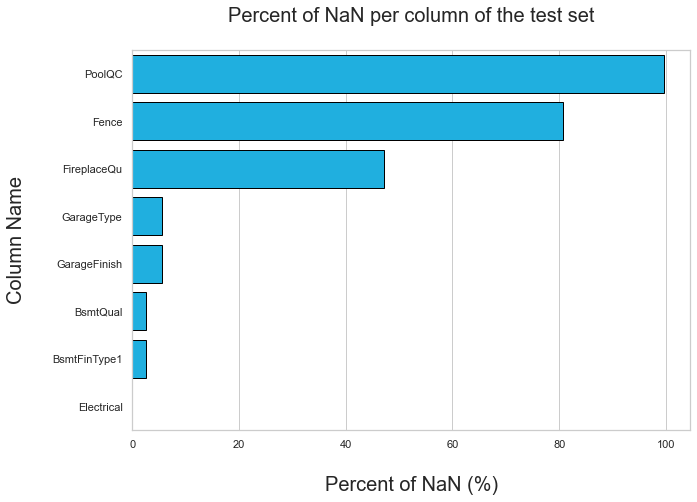

<IPython.core.display.Javascript object>

In [28]:
# Check the NaN of the test set by ploting percent of missing values per column
column_with_nan = df_train_categ.columns[df_train_categ.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(
        round(df_train_categ[i].isnull().sum() * 100 / len(df_train_categ), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="deepskyblue")
p.set_title("Percent of NaN per column of the test set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

<font color='darkblue'>Drop the features where the percentage of NaN is higher than 5% to avoid introducing any error. Than impute the NaN of 'BsmtQual' and 'Electrical' by the corresponding modal class<font>

In [29]:
# Drop the features where the percentage of NaN is higher than 5%
df_train_categ.drop(["PoolQC", "Fence", "FireplaceQu",
                     "GarageType", "GarageFinish"], axis=1, inplace=True,)

<IPython.core.display.Javascript object>

In [30]:
# Fill the NaN of each feature by the corresponding modal class
categ_fill_null = {"BsmtQual": df_train_categ["BsmtQual"].mode().iloc[0],
                   "BsmtFinType1": df_train_categ["BsmtFinType1"].mode().iloc[0],
                   "Electrical": df_train_categ["Electrical"].mode().iloc[0]}

df_train_categ = df_train_categ.fillna(value=categ_fill_null)

<IPython.core.display.Javascript object>

### <font color='darkblue'>Test set</font>

<font color='darkblue'>The columns that have been deleted in the train set must also be deleted in the test set so that the two data sets remain identical for the modeling and prediction.<font>

In [31]:
# Drop the same features from test set as for the train set
df_test_categ.drop(["PoolQC", "Fence", "FireplaceQu",
                    "GarageType", "GarageFinish"], axis=1, inplace=True,)

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Column Name\n')

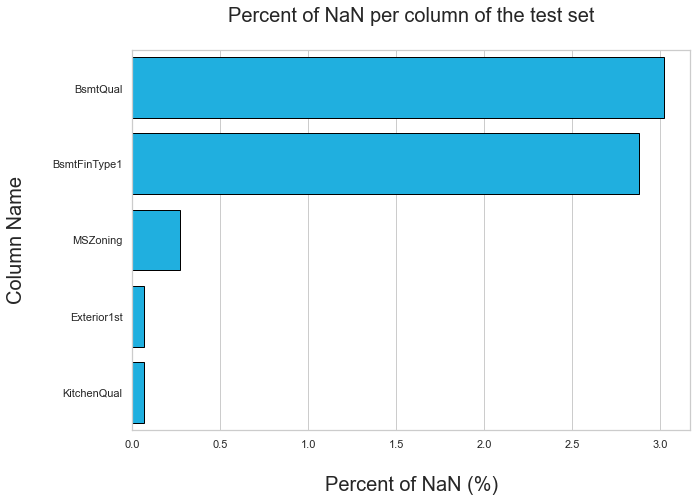

<IPython.core.display.Javascript object>

In [32]:
# Check the NaN of the test set by ploting percent of missing values per column
column_with_nan = df_test_categ.columns[df_test_categ.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(
        round(df_test_categ[i].isnull().sum() * 100 / len(df_test_categ), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="deepskyblue")
p.set_title("Percent of NaN per column of the test set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

In [33]:
# Fill the NaN of each feature by the corresponding modal class
categ_fill_null = {"BsmtQual": df_test_categ["BsmtQual"].mode().iloc[0],
                   "BsmtFinType1": df_test_categ["BsmtFinType1"].mode().iloc[0],
                   "MSZoning": df_test_categ["MSZoning"].mode().iloc[0],
                   "Exterior1st": df_test_categ["Exterior1st"].mode().iloc[0],
                   "KitchenQual": df_test_categ["KitchenQual"].mode().iloc[0]}

df_test_categ = df_test_categ.fillna(value=categ_fill_null)

<IPython.core.display.Javascript object>

### <font color='darkblue'>I.3.3. Transform Categorical features into Binary features (get_dummies)</font>

In [34]:
# Train set
for i in df_train_categ.columns.tolist()[:-1]:
    df_dummies = pd.get_dummies(df_train_categ[i], prefix=i)

    # merge both tables
    df_train_categ = df_train_categ.join(df_dummies)

# Select the binary features only
df_train_binary = df_train_categ.iloc[:, 18:]
df_train_binary.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_Corner,...,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [35]:
# Test set
for i in df_test_categ.columns.tolist():
    df_dummies = pd.get_dummies(df_test_categ[i], prefix=i)

    # merge both tables
    df_test_categ = df_test_categ.join(df_dummies)

# Select the binary features only
df_test_binary = df_test_categ.iloc[:, 17:]
df_test_binary.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_Corner,...,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

<font color='darkblue'>We can notice that in df_test_binary there is 118 columns while in df_train_binary there is 122. Let's see which columns are missing from df_test_binary

In [36]:
# Let's check if the column headings are the same in both data set, df_train and df_test
dif_1 = [x for x in df_train_binary.columns if x not in df_test_binary.columns]
print(
    f"Features present in df_train_categ and absent in df_test_categ: {dif_1}\n")

dif_2 = [x for x in df_test_binary.columns if x not in df_train_binary.columns]
print(
    f"Features present in df_test_categ set and absent in df_train_categ: {dif_2}")

Features present in df_train_categ and absent in df_test_categ: ['HouseStyle_2.5Fin', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Electrical_Mix']

Features present in df_test_categ set and absent in df_train_categ: []


<IPython.core.display.Javascript object>

<font color='darkblue'>Four of the binary features are absent from the test set. Thus, these features will be dropped from the train in order to have the same columns in both data set<font>

In [37]:
# Let's drop these columns from df_train_binary
df_train_binary.drop(dif_1, axis=1, inplace=True)

# Check again if the column headings are the same in both data set
dif_1 = [x for x in df_train_binary.columns if x not in df_test_binary.columns]
print(
    f"Features present in df_train_categ and absent in df_test_categ: {dif_1}\n")

dif_2 = [x for x in df_test_binary.columns if x not in df_train_binary.columns]
print(
    f"Features present in df_test_categ set and absent in df_train_categ: {dif_2}")

Features present in df_train_categ and absent in df_test_categ: []

Features present in df_test_categ set and absent in df_train_categ: []


<IPython.core.display.Javascript object>

<font color='darkblue'>Both data set have the same featues now<font>

## <font color='darkblue'>I.4. Merge numerical and binary features into one data set</font>

In [135]:
# Add binary features to numreical features
# Train set
df_train_new = df_train_imputed.join(df_train_binary)
print(f"Train set: {df_train_new.shape}")

# Test set
df_test_new = df_test_imputed.join(df_test_binary)
print(f"Test set: {df_test_new.shape}")

Train set: (1460, 135)
Test set: (1459, 134)


<IPython.core.display.Javascript object>

## <font color='darkblue'>I.5. Drop outliers from the train set</font>

<font color='darkblue'>Previoulsy in the part 'I.2. Numerical Features' of this notebook I noticed some houses with large surface ("GrLivArea", "TotalBsmtSF" and "GarageArea") and with a very low Price. It is better for our models to drop theese outliers.
    
I also noticed for both features "WoodDeckSF" and "OpenPorchSF" a high number of 0 values with a correspondingly high price variation. These outliers should be deleted.
However, since the number of these outliers is very important, the best thing to do is to drop these columns.

In [136]:
# Drop "WoodDeckSF" and "OpenPorchSF"
df_train_new.drop(["WoodDeckSF", "OpenPorchSF"], axis=1, inplace=True)
df_test_new.drop(["WoodDeckSF", "OpenPorchSF"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [137]:
# Let's handle the outliers in "GrLivArea", "TotalBsmtSF" and "GarageArea"
# Outliers in "GrLivArea"
outliers1 = df_train_new[(df_train_new["GrLivArea"] > 4000) & (
    df_train_new["SalePrice"] <= 200000)].index.tolist()

# Outliers in "TotalBsmtSF"
outliers2 = df_train_new[(df_train_new["TotalBsmtSF"] > 3000) & (
    df_train_new["SalePrice"] <= 400000)].index.tolist()

# Outliers in "GarageArea"
outliers3 = df_train_new[(df_train_new["GarageArea"] > 1200) & (
    df_train_new["SalePrice"] <= 300000)].index.tolist()

# List of all the outliers
outliers = outliers1 + outliers2 + outliers3
outliers = list(set(outliers))
print(outliers)

[1061, 581, 1190, 523, 332, 1298]


<IPython.core.display.Javascript object>

In [138]:
# Drop these outlier
df_train_new = df_train_new.drop(df_train_new.index[outliers])

# Reset index
df_train_new = df_train_new.reset_index().drop("index", axis=1)
df_train_new

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,7.00,"2,003.00","2,003.00",856.00,856.00,"1,710.00",2.00,8.00,2.00,548.00,...,0,0,1,0,0,0,0,0,1,0
1,6.00,"1,976.00","1,976.00","1,262.00","1,262.00","1,262.00",2.00,6.00,2.00,460.00,...,0,0,0,1,0,0,0,0,1,0
2,7.00,"2,001.00","2,002.00",920.00,920.00,"1,786.00",2.00,6.00,2.00,608.00,...,0,0,1,0,0,0,0,0,1,0
3,7.00,"1,915.00","1,970.00",756.00,961.00,"1,717.00",1.00,7.00,3.00,642.00,...,0,0,1,0,1,0,0,0,0,0
4,8.00,"2,000.00","2,000.00","1,145.00","1,145.00","2,198.00",2.00,9.00,3.00,836.00,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,6.00,"1,999.00","2,000.00",953.00,953.00,"1,647.00",2.00,7.00,2.00,460.00,...,0,0,0,1,0,0,0,0,1,0
1450,6.00,"1,978.00","1,988.00","1,542.00","2,073.00","2,073.00",2.00,7.00,2.00,500.00,...,0,0,0,1,0,0,0,0,1,0
1451,7.00,"1,941.00","2,006.00","1,152.00","1,188.00","2,340.00",2.00,9.00,1.00,252.00,...,0,0,1,0,0,0,0,0,1,0
1452,5.00,"1,950.00","1,996.00","1,078.00","1,078.00","1,078.00",1.00,5.00,1.00,240.00,...,0,0,1,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

# <font color='darkblue'>II. Feature engineering</font>

<font color='darkblue'>While looking closley at the remaining features, we can notice that several of them designate a given surface of the property. Thus, I will try to combine some of these surfaces into indicators without losing the information they provide.
    
In addition, I will turn years into age, e.g. year of construction will be transformed into age of the house since the construction. <font>

In [139]:
# Define a function to calculate the occupancy rate of the first floor of the total living area


def floor_occupation(x):
    """First floor occupation of the total live area

    floor_occupation equation has the following form:
    (1st Floor Area * 100) / (Ground Live Area)

    Args:
        x -- the corresponding feature

    Returns:
        0 -- if Ground Live Area = 0
        equation -- if Ground Live Area > 0
    """
    if x["GrLivArea"] == 0:
        return 0
    else:
        return x["1stFlrSF"] * 100 / x["GrLivArea"]


# Apply the function on train and test set
df_train_new["1stFlrPercent"] = df_train_new.apply(
    lambda x: floor_occupation(x), axis=1)

df_test_new["1stFlrPercent"] = df_test_new.apply(
    lambda x: floor_occupation(x), axis=1)

# Drop "1stFlrSF" and "2ndFlrSF"
df_train_new.drop(["1stFlrSF", "2ndFlrSF"], axis=1, inplace=True)
df_test_new.drop(["1stFlrSF", "2ndFlrSF"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [140]:
# Define a function to calculate the occupancy rate of the finished basement area


def bsmt_finish(x):
    """Propotion of finished area in basement 

    bsmt_finish equation has the following form:
    (Finished Basement Area * 100) / (Total Basement Area)

    Args:
        x -- the corresponding feature

    Returns:
        0 -- if Total Basement Area = 0
        equation -- if Total Basement Area > 0
    """
    if x["TotalBsmtSF"] == 0:
        return 0
    else:
        return x["BsmtFinSF1"] * 100 / x["TotalBsmtSF"]


# Apply the function on train and test set
df_train_new["BsmtFinPercent"] = df_train_new.apply(
    lambda x: bsmt_finish(x), axis=1)

df_test_new["BsmtFinPercent"] = df_test_new.apply(
    lambda x: bsmt_finish(x), axis=1)

# Drop "BsmtFinSF1"
df_train_new.drop(["BsmtFinSF1"], axis=1, inplace=True)
df_test_new.drop(["BsmtFinSF1"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [141]:
# Define a function to calculate the available garage area per car


def area_percar(x):
    """Area per car of the garage 

    area_percar equation has the following form:
    (Garage Area / Car Capacity)

    Args:
        x -- the corresponding feature

    Returns:
        0 -- if Car Capacity = 0
        equation -- if Car Capacity > 0
    """
    if x["GarageCars"] == 0:
        return 0
    else:
        return x["GarageArea"] / x["GarageCars"]


# Apply the function on train and test set
df_train_new["AreaPerCar"] = df_train_new.apply(
    lambda x: area_percar(x), axis=1)

df_test_new["AreaPerCar"] = df_test_new.apply(
    lambda x: area_percar(x), axis=1)

# Drop the total garage area "GarageArea"
df_train_new.drop(["GarageArea"], axis=1, inplace=True)
df_test_new.drop(["GarageArea"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [142]:
# Convert Year of construction to Age of the house since the construction
df_train_new["AgeSinceConst"] = (
    df_train_new["YearBuilt"].max() - df_train_new["YearBuilt"])

df_test_new["AgeSinceConst"] = df_test_new["YearBuilt"].max() - \
    df_test_new["YearBuilt"]

# Drop "YearBuilt"
df_train_new.drop(["YearBuilt"], axis=1, inplace=True)
df_test_new.drop(["YearBuilt"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [143]:
# Convert Year of remodeling to Age of the house since the remodeling
df_train_new["AgeSinceRemod"] = (
    df_train_new["YearRemodAdd"].max() - df_train_new["YearRemodAdd"])

df_test_new["AgeSinceRemod"] = (
    df_test_new["YearRemodAdd"].max() - df_test_new["YearRemodAdd"])

# Drop "YearRemodAdd"
df_train_new.drop(["YearRemodAdd"], axis=1, inplace=True)
df_test_new.drop(["YearRemodAdd"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

<font color='darkblue'>To avoid redundancy and to mitigate the strong variations of surfaces according to the SalePrice. I will use the square root of all areas. Generally in real estate, as the area of the property increases, the price per square feet decreases, hence the use of square root for all areas. <font>

In [144]:
# Square root for all the features that designate the surface
sf_features = ["TotalBsmtSF", "GrLivArea", "MasVnrArea", "AreaPerCar"]

for i in sf_features:
    # loop over i (features) to calculate the square root of surfaces
    # Train set
    df_train_new[i] = np.sqrt((df_train_new[i]))

    # Test set
    df_test_new[i] = np.sqrt((df_test_new[i]))

<IPython.core.display.Javascript object>

# <font color='darkblue'>III.  Preparing data for modeling</font>

<font color='darkblue' size='3'>This modeling part is mainly based on these Kaggle cores:
- [House pricing explained step by step](https://www.kaggle.com/code/binarymachine/house-pricing-explained-step-by-step)

## <font color='darkblue'>III.1.  Target variable 'SalePrice'</font>

<font color='darkblue'>log transformation of the independent variable ('SalePrice') to have a distribution that approaches the normal distribution <font>

Text(0, 0.5, '')

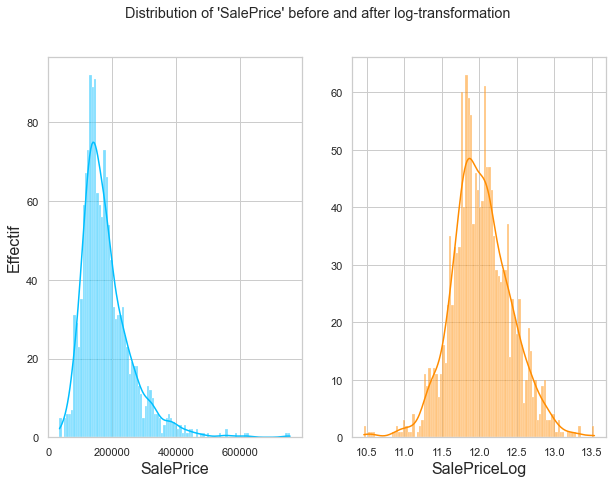

<IPython.core.display.Javascript object>

In [145]:
# Log transformation of the target variable "SalePrice"
df_train_new["SalePriceLog"] = np.log(df_train_new.SalePrice)

# Plot the distribution before and after transformation
fig, axes = plt.subplots(1, 2)
fig.suptitle("Distribution of 'SalePrice' before and after log-transformation")

# before log transformation
p = sns.histplot(ax=axes[0], x=df_train_new["SalePrice"],
                 kde=True, bins=100, color="deepskyblue")
p.set_xlabel("SalePrice", fontsize=16)
p.set_ylabel("Effectif", fontsize=16)

# after log transformation
q = sns.histplot(ax=axes[1], x=df_train_new["SalePriceLog"],
                 kde=True, bins=100, color="darkorange")
q.set_xlabel("SalePriceLog", fontsize=16)
q.set_ylabel("", fontsize=16)

In [146]:
# Drop the original SalePrice
df_train_new.drop(["SalePrice"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

## <font color='darkblue'>III.2. Split data into train and test set and Standardization

In [147]:
# Extract the features (X) and the target (y)
# Features (X)
X = df_train_new[[i for i in list(
    df_train_new.columns) if i != "SalePriceLog"]]
print(X.shape)

# Target (y)
y = df_train_new.loc[:, "SalePriceLog"]
print(y.shape)

(1454, 131)
(1454,)


<IPython.core.display.Javascript object>

In [148]:
# Split into X_train and X_test (by stratifying on y)
# scsplit allows to stratify on a continuous variable by splitting it in bins
X_train, X_test, y_train, y_test = scsplit(X, y, stratify=y)
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")
print(f"\nX_test:{X_test.shape}\ny_test:{y_test.shape}")

X_train:(1017, 131)
y_train:(1017,)

X_test:(437, 131)
y_test:(437,)


<IPython.core.display.Javascript object>

In [149]:
# Standardize the data
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)
# The same standardization is applied for df_test_new
df_test_new = std_scale.transform(df_test_new)


# The output of standardization is a vector. Let's turn it into a table
# Convert X, y and test data into dataframe
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
df_test_new = pd.DataFrame(df_test_new, columns=X.columns)

y_train = pd.DataFrame(y_train)
y_train = y_train.reset_index().drop("index", axis=1)

y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index().drop("index", axis=1)

<IPython.core.display.Javascript object>

## <font color='darkblue'>III.3. Backward Stepwise Regression<font>

<font color='darkblue'>Let's lighten the model vith a Backward Stepwise Regression
    
Backward Stepwise Regression is a stepwise regression approach that begins with a full
(saturated) model and at each step gradually eliminates variables from the regression model to find a
reduced model that best explains the data. Also known as Backward Elimination regression.
https://www.analystsoft.com/en/products/statplus/content/help/pdf/analysis_regression_backward_stepwise_elimination_regression_model.pdf<font>


In [150]:
Selected_Features = []


def backward_regression(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    """To select feature with Backward Stepwise Regression 

    Args:
        X -- features values
        y -- target variable
        initial_list -- features header
        threshold_in -- pvalue threshold of features to keep
        threshold_out -- pvalue threshold of features to drop
        verbose -- true to produce lots of logging output

    Returns:
        list of selected features for modeling 
    """
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature : {worst_feature}, {worst_pval} ")
        if not changed:
            break
    Selected_Features.append(included)
    print(f"\nSelected Features:\n{Selected_Features[0]}")


# Application of the backward regression function on our training data
backward_regression(X_train, y_train)

worst_feature : Neighborhood_Somerst, 0.9892245177407889 
worst_feature : Neighborhood_NAmes, 0.9909327718205517 
worst_feature : ExterQual_TA, 0.9859069346598902 
worst_feature : BsmtFinType1_Unf, 0.9699823802760146 
worst_feature : Neighborhood_BrDale, 0.9559912886402753 
worst_feature : BsmtQual_Gd, 0.9530181437519292 
worst_feature : Exterior1st_AsbShng, 0.937843939240943 
worst_feature : LotConfig_FR3, 0.9363963914165848 
worst_feature : LotConfig_Inside, 0.9538147122411529 
worst_feature : Exterior1st_WdShing, 0.9345390905035368 
worst_feature : RoofStyle_Gable, 0.9309962538374594 
worst_feature : Foundation_PConc, 0.9226607146363559 
worst_feature : TotRmsAbvGrd, 0.9113951880607513 
worst_feature : Condition1_PosA, 0.9042554679356252 
worst_feature : ExterQual_Gd, 0.8675941143583431 
worst_feature : Condition1_PosN, 0.861812357049389 
worst_feature : Condition1_Norm, 0.9310036437233759 
worst_feature : HeatingQC_Gd, 0.8604092060662494 
worst_feature : Neighborhood_Timber, 0.8093

<IPython.core.display.Javascript object>

In [151]:
# Keep the selected features only
X_train = X_train.loc[:, Selected_Features[0]]
X_test = X_test.loc[:, Selected_Features[0]]
df_test_new = df_test_new.loc[:, Selected_Features[0]]

<IPython.core.display.Javascript object>

## <font color='darkblue'>III.4. Variance Inflation Factor<font>

<font color='darkblue'>     
Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable.
    
A feature with a VIF higher than 10 implies (5 is also common) that there is a multi-collinearity with the latter.
    
https://www.investopedia.com/terms/v/variance-inflation-factor.asp#:~:text=Variance%20inflation%20factor%20(VIF)%20is,only%20that%20single%20independent%20variable.<font>

In [152]:
# Here I calculate VIF for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    X_train.values, i) for i in range(X_train.shape[1])]

# VIF results in a table
vif["features"] = X_train.columns
vif.round(1)

,VIF Factor,features
0,3.60,OverallQual
1,1.90,TotalBsmtSF
2,3.50,GrLivArea
3,2.40,GarageCars
4,1.60,Fireplaces
5,1.10,MSZoning_C (all)
6,1.30,MSZoning_FV
7,1.60,MSZoning_RM
8,1.00,LotShape_IR3
9,1.10,LotConfig_CulDSac


<IPython.core.display.Javascript object>

In [153]:
# Select features with high VIF
high_vif_list = vif[vif["VIF Factor"] > 10]["features"].tolist()

if len(high_vif_list) == 0:
    # print empty list if low multicolinearity
    print(f"None of the features have a high multicollinearity")
else:
    # print list of features with high multicolinearity
    print(f"List of features with high multicollinearity: {high_vif_list}")

List of features with high multicollinearity: ['Electrical_FuseA', 'Electrical_FuseF', 'Electrical_SBrkr']


<IPython.core.display.Javascript object>

<font color='darkblue'>The strong muticollinearity is probably due to the presence of a lot 0's in these binary features. These features must be dropped<font>

In [154]:
# Drop features with high multicollinearity from X_train, X_test and df_test_new
X_train.drop(["Electrical_FuseA", "Electrical_FuseF",
              "Electrical_SBrkr"], axis=1, inplace=True)

X_test.drop(["Electrical_FuseA", "Electrical_FuseF",
             "Electrical_SBrkr"], axis=1, inplace=True)

df_test_new.drop(["Electrical_FuseA", "Electrical_FuseF",
                  "Electrical_SBrkr"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

## <font color='darkblue'>III.5. Cook distance<font>

<font color='darkblue'>By calculating Cook distance we can detect influential observations in a regression model. Cook distance detects data with large residuals (outliers) that can distort the prediction and the accuracy of a regression.<font>

In [155]:
X_constant = sm.add_constant(X_train)

model = sm.OLS(y_train, X_constant)
lr = model.fit()

# Cook distance
np.set_printoptions(suppress=True)

# Create an instance of influence
influence = lr.get_influence()

# Get Cook's distance for each observation
cooks = influence.cooks_distance

# Result as a dataframe
cook_df = pd.DataFrame({"Cook_Distance": cooks[0], "p_value": cooks[1]})
cook_df.head()

,Cook_Distance,p_value
0,0.00,1.00
1,0.00,1.00
2,0.00,1.00
3,0.00,1.00
4,0.00,1.00


<IPython.core.display.Javascript object>

In [156]:
# Remove the influential observation from X_train and y_train
influent_observation = cook_df[cook_df["p_value"] < 0.05].index.tolist()
print(f"Influential observations dropped: {influent_observation}")

# Drop these obsrevations
X_train = X_train.drop(X_train.index[influent_observation])
y_train = y_train.drop(y_train.index[influent_observation])

List of influential observation that has been dropped: [376, 430]


<IPython.core.display.Javascript object>

# <font color='darkblue'>IV. Modeling</font>

## <font color = 'darkblue'> IV.1. Models and metrics selection<font>

<font color = 'darkblue'> Here I am going to use RMSE and R² metrics in order to measure the performance of the selected models and their predictions.
    
Then I will test the models that best meet the estimation of house prices. It's clearly a regression so here are the following models I will use:
- Ridge regression
- Lasso regression
- Elastic Net regression
- Support Vector regression (SVR)
- Random Forest regression
- XGBoost
- LigthGBM
    <font>

In [89]:
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

<IPython.core.display.Javascript object>

In [157]:
# Let's define a function for each metrics
# R²
def rsqr_score(test, pred):
    """Calculate R squared score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        R squared score 
    """
    r2_ = r2_score(test, pred)
    return r2_


# RMSE
def rmse_score(test, pred):
    """Calculate Root Mean Square Error score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        Root Mean Square Error score
    """
    rmse_ = np.sqrt(mean_squared_error(test, pred))
    return rmse_


# Print the scores
def print_score(test, pred):
    """Print calculated score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        print the regressor name
        print the R squared score
        print Root Mean Square Error score
    """

    print(f"- Regressor: {regr.__class__.__name__}")
    print(f"R²: {rsqr_score(test, pred)}")
    print(f"RMSE: {rmse_score(test, pred)}\n")

<IPython.core.display.Javascript object>

In [158]:
# Define regression models
ridge = Ridge()
lasso = Lasso(alpha=0.001)
elastic = ElasticNet(alpha=0.001)
svr = SVR()
rdf = RandomForestRegressor()
xgboost = XGBRegressor()
lgbm = LGBMRegressor()

# Train models on X_train and y_train
for regr in [ridge, lasso, elastic, svr, rdf, xgboost, lgbm]:
    # fit the corresponding model
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    # Print the defined metrics above for each classifier
    print_score(y_test, y_pred)

- Regressor: Ridge
R²: 0.9116817339961016
RMSE: 0.12268659769261202

- Regressor: Lasso
R²: 0.912038360128933
RMSE: 0.1224386449938313

- Regressor: ElasticNet
R²: 0.9119146205993919
RMSE: 0.12252473465675755

- Regressor: SVR
R²: 0.8296029871401601
RMSE: 0.17041304811630215

- Regressor: RandomForestRegressor
R²: 0.8941288445861488
RMSE: 0.13432618558031767

- Regressor: XGBRegressor
R²: 0.880334076777946
RMSE: 0.14280950173663662

- Regressor: LGBMRegressor
R²: 0.8942575346984692
RMSE: 0.1342445216553802



<IPython.core.display.Javascript object>

<font color = 'darkblue'>According to the result of R² and Root Mean Squared of these 7 models, we can conclude that the relationship between the features and the target variable is clearly linear. Thus, in the next part I will optimize the hyperparameters of all the models except SVR. <font>
    
<font color='darkblue'> Indeed, SVR acknowledges the presence of non-linearity in the data and provides a proficient prediction model. The basic idea behind SVR is to find the best fit line which is a hyperplane that has the maximum number of points. It is clear that our model is linear that's why I will not optimize the SVR model<font>

[Click here for more information](https://towardsdatascience.com/unlocking-the-true-power-of-support-vector-regression-847fd123a4a0)

## <font color = 'darkblue'> IV.2. Hyperparameters tuning and model optimization<font>

### <font color='darkblue'> IV.2.1. Ridge regression<font>

<font color='darkblue'> Ridge will reduce the impact of features that are not important in predicting the target values.
    
[Click here for more information about Ridge regression](https://medium.com/@vijay.swamy1/lasso-versus-ridge-versus-elastic-net-1d57cfc64b58)<font>


In [167]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters
alphas = np.logspace(-5, 5, 50).tolist()

tuned_parameters = {"alpha": alphas}

# GridSearch
ridge_cv = GridSearchCV(Ridge(), tuned_parameters, cv=10, n_jobs=-1, verbose=1)

# fit the GridSearch on train set
ridge_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {ridge_cv.best_params_}")
print(f"Best R² (train): {ridge_cv.best_score_}")

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best hyperparameters: {'alpha': 13.257113655901108}
Best R² (train): 0.9043911767551072


<IPython.core.display.Javascript object>

In [168]:
# Ridge Regressor with the best hyperparameters
ridge_mod = Ridge(alpha=ridge_cv.best_params_["alpha"])

# Fit the model on train set
ridge_mod.fit(X_train, y_train)

# Predict on test set
y_pred = ridge_mod.predict(X_test)

print(f"- {ridge_mod.__class__.__name__}")
print(f"R²: {rsqr_score(y_test, y_pred)}")
print(f"RMSE: {rmse_score(y_test, y_pred)}")

- Ridge
R²: 0.9118155801690931
RMSE: 0.12259359678470551


<IPython.core.display.Javascript object>

In [169]:
# Save the model results into lists
model_list = []
r2_list = []
rmse_list = []

model_list.append(ridge_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred), 4))
rmse_list.append(round(rmse_score(y_test, y_pred), 4))

<IPython.core.display.Javascript object>

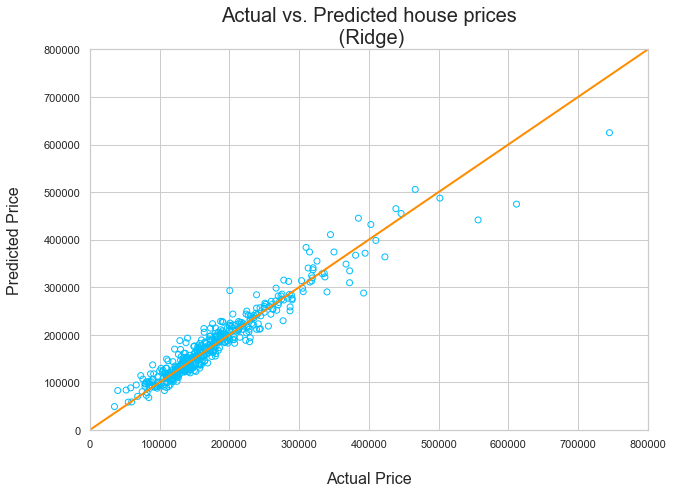

<IPython.core.display.Javascript object>

In [170]:
# Plot Actual vs. Predicted house prices
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices\n (Ridge)", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

<font color='darkblue'> The model is able to predict house prices. However, it underestimates the prices of houses above 400,000 dollars <font>

### <font color='darkblue'> IV.2.2. Lasso regression<font>

<font color='darkblue'> Lasso will eliminate many features, and reduce overfitting in the linear model.

[Click here for more information about Lasso regression](https://medium.com/@vijay.swamy1/lasso-versus-ridge-versus-elastic-net-1d57cfc64b58)<font>

In [171]:
# Define hyperparameters
alphas = np.logspace(-5, 5, 50).tolist()

tuned_parameters = {"alpha": alphas}

# GridSearch
lasso_cv = GridSearchCV(Lasso(), tuned_parameters, cv=10, n_jobs=-1, verbose=1)

# fit the GridSearch on train set
lasso_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {lasso_cv.best_params_}")
print(f"Best R² (train): {lasso_cv.best_score_}")

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best hyperparameters: {'alpha': 1e-05}
Best R² (train): 0.9042574915071023


<IPython.core.display.Javascript object>

In [172]:
# Lasso Regressor with the best hyperparameters
lasso_mod = Lasso(alpha=lasso_cv.best_params_["alpha"])

# Fit the model on train set
lasso_mod.fit(X_train, y_train)

# Predict on test set
y_pred = lasso_mod.predict(X_test)

print(f"- {lasso_mod.__class__.__name__}")
print(f"R²: {rsqr_score(y_test, y_pred)}")
print(f"RMSE: {rmse_score(y_test, y_pred)}")

- Lasso
R²: 0.9116698439426237
RMSE: 0.12269485590000202


<IPython.core.display.Javascript object>

In [173]:
# Save the model results into lists
model_list.append(lasso_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred), 4))
rmse_list.append(round(rmse_score(y_test, y_pred), 4))

<IPython.core.display.Javascript object>

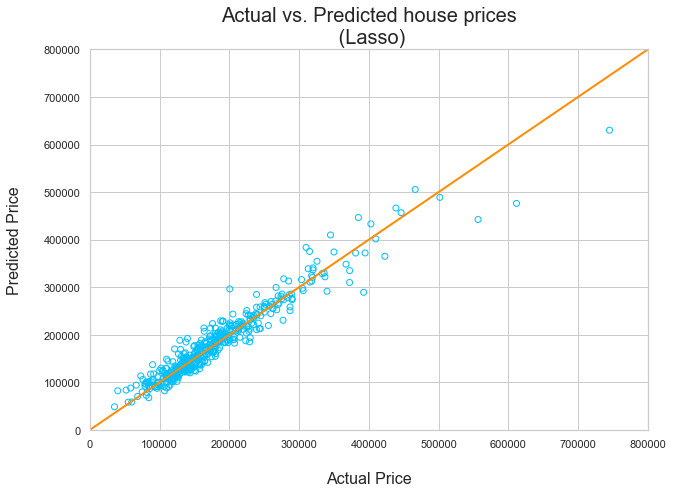

<IPython.core.display.Javascript object>

In [174]:
# Plot Actual vs. Predicted house prices
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices\n (Lasso)", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

### <font color = 'darkblue'> IV.2.3. Elastic Net regression <font>

<font color='darkblue'> Elastic Net combines feature elimination from Lasso and feature coefficient reduction from the Ridge model to improve the model’s predictions.
    
[Click here for more information about Elastic Net regression](https://medium.com/@vijay.swamy1/lasso-versus-ridge-versus-elastic-net-1d57cfc64b58)<font>

In [175]:
# Define hyperparameters
alphas = np.logspace(-5, 5, 50).tolist()
ratios = np.arange(0, 1, 0.05)

tuned_parameters = {"alpha": alphas, "l1_ratio": ratios}

# GridSearch
elastic_cv = GridSearchCV(
    ElasticNet(), tuned_parameters, cv=10, n_jobs=-1, verbose=1)

# fit the GridSearch on train set
elastic_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {elastic_cv.best_params_}")
print(f"Best R² (train): {elastic_cv.best_score_}")

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits
Best hyperparameters: {'alpha': 0.018420699693267165, 'l1_ratio': 0.0}
Best R² (train): 0.9043936508595767


<IPython.core.display.Javascript object>

In [176]:
# Elastic Net Regressor with the best hyperparameters
elastic_mod = ElasticNet(alpha=elastic_cv.best_params_[
                         "alpha"], l1_ratio=elastic_cv.best_params_["l1_ratio"])

# Fit the model on train set
elastic_mod.fit(X_train, y_train)

# Predict on test set
y_pred = elastic_mod.predict(X_test)

print(f"- {elastic_mod.__class__.__name__}")
print(f"R²: {rsqr_score(y_test, y_pred)}")
print(f"RMSE: {rmse_score(y_test, y_pred)}")

- ElasticNet
R²: 0.9118338962166483
RMSE: 0.12258086467873959


<IPython.core.display.Javascript object>

In [177]:
# Save the model results into lists
model_list.append(elastic_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred), 4))
rmse_list.append(round(rmse_score(y_test, y_pred), 4))

<IPython.core.display.Javascript object>

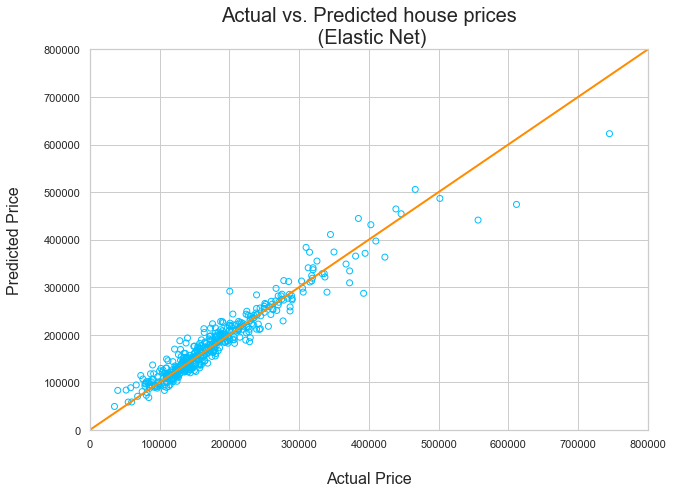

<IPython.core.display.Javascript object>

In [178]:
# Plot Actual vs. Predicted house prices
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices\n (Elastic Net)", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

### <font color = 'darkblue'> IV.2.4. Random Forest regression <font>

<font color='darkblue'>Random Forest Regression it’s a meta estimator that fits a number of Decision Trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

[Click here for more information about Random Forest Regression](https://towardsdatascience.com/a-practical-introduction-to-9-regression-algorithms-389057f86eb9)<font>


In [179]:
# Define hyperparameters
tuned_parameters = {"n_estimators": [500, 700, 1000, 1500],
                    "max_depth": [1, 2, 3, 4, 5],
                    "min_samples_split": [1, 2, 3, 4, 5]}

# GridSearch
rfr_cv = GridSearchCV(RandomForestRegressor(),
                      tuned_parameters, cv=10, n_jobs=-1, verbose=1)

# fit the GridSearch on train set
rfr_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {rfr_cv.best_params_}")
print(f"Best R²: {rfr_cv.best_score_}")

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best hyperparameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 1500}
Best R²: 0.8265190178837816


<IPython.core.display.Javascript object>

In [180]:
# RandomForest Regressor with the best hyperparameters
rfr_mod = RandomForestRegressor(max_depth=rfr_cv.best_params_["max_depth"],
                                min_samples_split=rfr_cv.best_params_[
                                    "min_samples_split"],
                                n_estimators=rfr_cv.best_params_["n_estimators"])

# Fit the model on train set
rfr_mod.fit(X_train, y_train)

# Predict on test set
y_pred = rfr_mod.predict(X_test)

print(f"- {rfr_mod.__class__.__name__}")
print(f"R²: {rsqr_score(y_test, y_pred)}")
print(f"RMSE: {rmse_score(y_test, y_pred)}")

- RandomForestRegressor
R²: 0.8619650653128814
RMSE: 0.15337916286262626


<IPython.core.display.Javascript object>

In [181]:
# Save the model results into lists
model_list.append(rfr_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred), 4))
rmse_list.append(round(rmse_score(y_test, y_pred), 4))

<IPython.core.display.Javascript object>

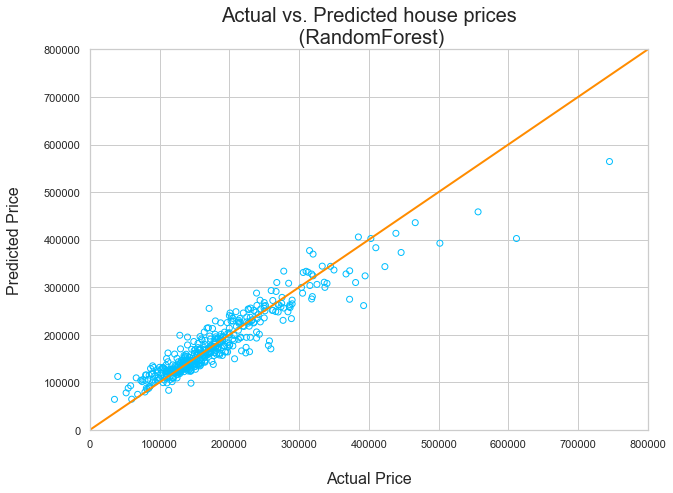

<IPython.core.display.Javascript object>

In [182]:
# Plot Actual vs. Predicted house prices
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices\n (RandomForest)", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

### <font color = 'darkblue'> IV.2.5. XGBoost regression <font>

<font color='darkblue'>XGBoost is one of the most popular algorithms that are based on Gradient Boosted Machines. Gradient Boosting refers to a methodology where an ensemble of weak learners is used to improve the model performance in terms of efficiency, accuracy, and interpretability. Gradient Boosting can be applied to a regression by taking the average of the outputs by the weak learners. <font>

[Click here for more information about XGBoost](https://neptune.ai/blog/xgboost-vs-lightgbm)

In [183]:
# Define hyperparameters
tuned_parameters = {"max_depth": [3, 6, 10],
                    "learning_rate": [0.01, 0.05, 0.1],
                    "n_estimators": [100, 500, 1000],
                    "colsample_bytree": [0.3, 0.7]}

# GridSearch
xgbr_cv = GridSearchCV(estimator=XGBRegressor(seed=20),
                       param_grid=tuned_parameters,
                       cv=10,
                       n_jobs=-1,
                       verbose=1)

# fit the GridSearch on train set
xgbr_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {xgbr_cv.best_params_}\n")
print(f"Best R²: {xgbr_cv.best_score_}")

Fitting 10 folds for each of 54 candidates, totalling 540 fits
Best hyperparameters: {'colsample_bytree': 0.3, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500}

Best R²: 0.8877136581296904


<IPython.core.display.Javascript object>

In [184]:
# XGB Regressor with the best hyperparameters
xgbr_mod = XGBRegressor(seed=20,
                        colsample_bytree=xgbr_cv.best_params_[
                            "colsample_bytree"],
                        learning_rate=xgbr_cv.best_params_["learning_rate"],
                        max_depth=xgbr_cv.best_params_["max_depth"],
                        n_estimators=xgbr_cv.best_params_["n_estimators"])

# Fit the model on train set
xgbr_mod.fit(X_train, y_train)

# Predict on test set
y_pred = xgbr_mod.predict(X_test)

print(f"- {xgbr_mod.__class__.__name__}")
print(f"R²: {rsqr_score(y_test, y_pred)}")
print(f"RMSE: {rmse_score(y_test, y_pred)}")

- XGBRegressor
R²: 0.9163715743605423
RMSE: 0.11938473961036913


<IPython.core.display.Javascript object>

In [185]:
# Save the model results into lists
model_list.append(xgbr_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred), 4))
rmse_list.append(round(rmse_score(y_test, y_pred), 4))

<IPython.core.display.Javascript object>

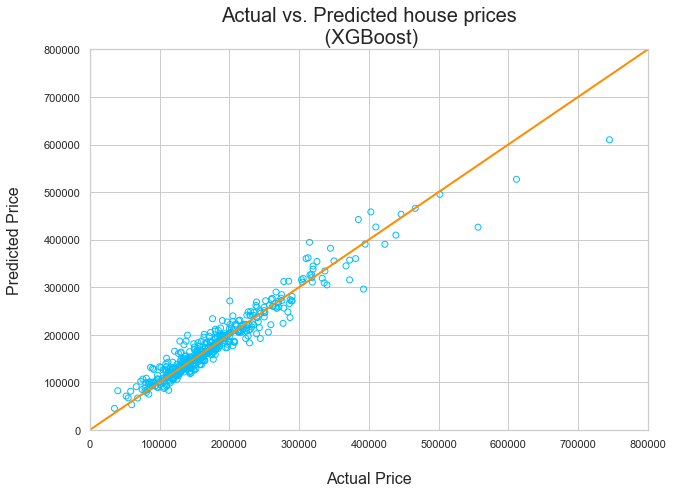

<IPython.core.display.Javascript object>

In [186]:
# Plot Actual vs. Predicted house prices
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices\n (XGBoost)", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

### <font color = 'darkblue'> IV.2.6. LightGBM regression <font>

<font color='darkblue'> LightGBM is also one of the most popular algorithms that are based on Gradient Boosted Machines.<font>

[Click here for more information about LightGBM](https://neptune.ai/blog/xgboost-vs-lightgbm)

In [187]:
# Define hyperparameters
tuned_parameters = {"max_depth": [3, 6, 10], "learning_rate": [
    0.01, 0.05, 0.1], "n_estimators": [100, 500, 1000], }

# GridSearch
lgbm_cv = GridSearchCV(estimator=LGBMRegressor(
), param_grid=tuned_parameters, cv=10, n_jobs=-1, verbose=1)

# fit the GridSearch on train set
lgbm_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {lgbm_cv.best_params_}\n")
print(f"Best R²: {lgbm_cv.best_score_}")

Fitting 10 folds for each of 27 candidates, totalling 270 fits
Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000}

Best R²: 0.8710771468055695


<IPython.core.display.Javascript object>

In [188]:
# LGBM Regressor with the best hyperparameters
lgbm_mod = LGBMRegressor(learning_rate=lgbm_cv.best_params_["learning_rate"],
                         max_depth=lgbm_cv.best_params_["max_depth"],
                         n_estimators=lgbm_cv.best_params_["n_estimators"])

# Fit the model on train set
lgbm_mod.fit(X_train, y_train)

# Predict on test set
y_pred = lgbm_mod.predict(X_test)

print(f"- {lgbm_mod.__class__.__name__}")
print(f"R²: {rsqr_score(y_test, y_pred)}")
print(f"RMSE: {rmse_score(y_test, y_pred)}")

- LGBMRegressor
R²: 0.9009300379695062
RMSE: 0.12993999756860247


<IPython.core.display.Javascript object>

In [189]:
# Save the model results into lists
model_list.append(lgbm_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred), 4))
rmse_list.append(round(rmse_score(y_test, y_pred), 4))

<IPython.core.display.Javascript object>

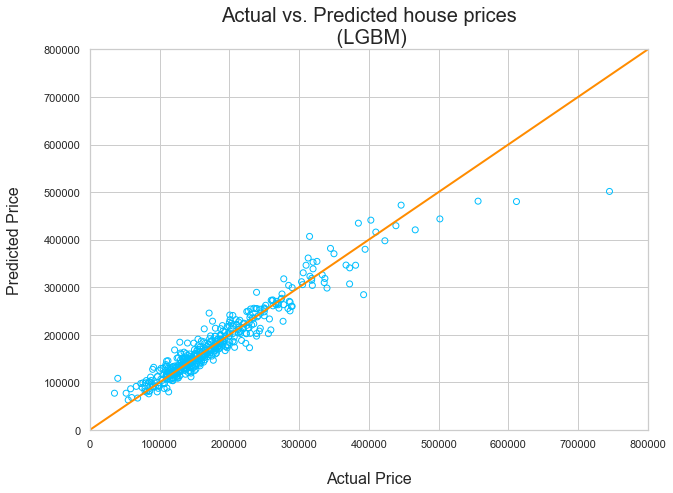

<IPython.core.display.Javascript object>

In [190]:
# Plot Actual vs. Predicted house prices
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices\n (LGBM)", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

## <font color ='darkblue'> IV.3. Choosing the best model<font>

In [194]:
# Create a table with pd.DataFrame
model_results = pd.DataFrame({"Model": model_list,
                              "R²": r2_list,
                              "RMSE": rmse_list})

model_results

,Model,R²,RMSE
0,Ridge,0.91,0.12
1,Lasso,0.91,0.12
2,ElasticNet,0.91,0.12
3,RandomForestRegressor,0.86,0.15
4,XGBRegressor,0.92,0.12
5,LGBMRegressor,0.90,0.13


<IPython.core.display.Javascript object>

<font color='darkblue'>The results show that that the best performances in terms of R squared (R²) and Root Mean Square Error (RMSE) correspond to the XGB Regressor.

The R² and RMSE scores of XGB Regressor are respectively 0.916 and 0.119. Indeed, our goal is to maximize R² and minimize RMSE.
     
Based on these results and the results of the figures that show the Actual prices vs. Predicted prices, we can conclude that the XGB Regressor model has the best performance.<font>
    
<font color='red'>Thus, XGB Regressor model will be chosen to predict house prices of the Test set of this Kaggle competition.

## <font color ='darkblue'> IV.4. Prediction on 'House Prices-Advanced Regression Techniques' test data set<font>

In [201]:
# Predictions from Ridge model
predictions_list = xgbr_mod.predict(df_test_new)

# Conversion of logarithmic predictions to logical data Sale Price
saleprice_preds = np.exp(predictions_list)

# DataFrame of test ID and their corresponding predictions
output = pd.DataFrame({"Id": Id_test_list,
                       "SalePrice": saleprice_preds})
output.head(10)

,Id,SalePrice
0,1461,"119,478.21"
1,1462,"157,864.14"
2,1463,"176,671.36"
3,1464,"192,283.11"
4,1465,"195,570.41"
5,1466,"169,526.70"
6,1467,"169,841.61"
7,1468,"164,130.64"
8,1469,"191,415.53"
9,1470,"120,936.63"


<IPython.core.display.Javascript object>

In [206]:
# Save the output
output.to_csv("submission.csv", index=False)

<IPython.core.display.Javascript object>